## **Project:** Wine Quality - <span style="color:darkcyan">EDA 'Exploratory Data Analysis'</span> <br> Mauro Cardoso

#### BUSINESS UNDERSTANDING / **PROJECT OBJECTIVE** »
- The aim of this analysis is to predict the quality of new wines without resorting to expert assessment. To this end, 6497 wines are registered, data from their respective chemical analyses, and the evaluation of experts. Using two datasets consisting on physicochemical data from red and white Vinho Verde wine samples, from the north of Portugal, and a quality classification, our client wants to build an application to automatically classify new samples of Vinho Verde.

The Wine Quality dataset contains information about various physicochemical properties of wines.
This dataset only has numeric variables:
    
| FEATURES | DESCRIPTION | VARIABLE TYPE
|:-------|:-------|:-------|
**fixed acidity:**| Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.|Continuous numerical|
**volatile acidity:**| These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3.|Continuous numerical|
**citric acid:**| The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.|Continuous numerical|
**residual sugar:**| The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.|Continuous numerical|
**chlorides:**| The amount of salt in the wine.|Continuous numerical|
**free sulfur dioxide:**| The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.|Continuous numerical|
**total sulfur dioxide:**| The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.|Continuous numerical|
**density:**| It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.|Continuous numerical|
**pH:**| Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).|Continuous numerical|
**sulphates:**| The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine.|Continuous numerical|
**alcohol:**| Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).|Continuous numerical|
**quality:**| A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.|Discrete numerical|
**type:**| Wine type - In this case can be white or red.|Nominal Categorical|

### Installs section:

### Imports section:

In [3]:
import pandas as pd
import random as rd
import numpy as np
import seaborn as sns
import scipy
import pickle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import norm
from matplotlib import pyplot as plt
from pathlib import Path

pd.set_option('expand_frame_repr', False) # expand print function visualization
pd.set_option('display.max_columns', None) # expand/use all columns
#pd.options.display.float_format = '{:20,.2f}'.format # Withdrawal of scientific notation

In [4]:
root_marker = 'README.md'

current_dir = Path.cwd()

while not (current_dir / root_marker).exists() and current_dir != current_dir.parent:
    current_dir = current_dir.parent

csv_path = current_dir / 'data' / 'processed' / 'wine_clean.csv'

df = pd.read_csv(csv_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,rlog_fixed_acidity,rlog_volatile_acidity,rlog_citric_acid,rlog_residual_sugar,rlog_chlorides,rlog_free_sulfur_dioxide,rlog_total_sulfur_dioxide,rlog_density,rlog_pH,rlog_sulphates,rlog_alcohol,quality_class,quality_num_class,type_r2
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,2.079442,0.239017,0.307485,3.077312,0.044017,3.828641,5.141664,0.693647,1.386294,0.371564,2.282382,medium,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1.987874,0.262364,0.292670,0.955511,0.047837,2.708050,4.890349,0.690143,1.458615,0.398776,2.351375,medium,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,2.208274,0.246860,0.336472,2.066863,0.048790,3.433987,4.584967,0.690694,1.449269,0.364643,2.406945,medium,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,medium,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,1.974081,0.470004,0.076961,1.098612,0.086178,3.496508,3.806662,0.690594,1.492904,0.457425,2.442347,medium,1,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,1.931521,0.438255,0.095310,1.163151,0.060154,3.688879,3.951244,0.690704,1.508512,0.565314,2.501436,medium,1,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,1.987874,0.412110,0.122218,1.193922,0.073250,3.401197,3.713572,0.691015,1.486140,0.559616,2.484907,medium,1,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,1.931521,0.497740,0.113329,1.098612,0.072321,3.496508,3.806662,0.690880,1.519513,0.536493,2.415914,medium,1,1


### Information and Comprehension:

#### Single Variable Analysis:



1. **Fixed Acidity**: This distribution is right-skewed, indicating that most wines have a lower fixed acidity, but there are a few with a much higher acidity. The peak is around 7 to 8.

2. **Volatile Acidity**: This distribution is also right-skewed with the majority of values clustered at the lower end, suggesting that wines typically have lower levels of volatile acidity. The peak is near 0.4.

3. **Citric Acid**: Another right-skewed distribution, with most wines containing lower concentrations of citric acid. The median is around 0.25.

4. **Residual Sugar**: This histogram shows a heavy right skew, with most wines having 10 grams per liter or less of residual sugar, but a long tail indicates that some wines have much higher amounts.

5. **Chlorides**: The distribution of chlorides is right-skewed, with a sharp peak close to 0.05, indicating most wines have low chloride content.

6. **Free Sulfur Dioxide**: The distribution is right-skewed with a peak around 30 mg/l. There is a long tail suggesting some wines have high sulfur dioxide content.

7. **Total Sulfur Dioxide**: This variable is also right-skewed and has a peak near 100 mg/l, similar to free sulfur dioxide, indicating that total sulfur dioxide content is also generally low in wines but can reach higher values.

8. **Density**: This variable shows a very sharp peak around 0.996, with a very narrow distribution, indicating that most wines have a density close to this value, with few variations.

9. **pH**: The pH levels of wine appear to be normally distributed, centered around 3.2, indicating that the acidity levels in wines tend to be consistent.

10. **Sulphates**: This distribution is somewhat right-skewed, although not as pronounced as others, with a peak just below 0.6.

11. **Alcohol**: The distribution of alcohol content is somewhat left-skewed or possibly bimodal, with peaks around 9% and 11%. This suggests that there are two common levels at which the alcohol content in wine stabilizes.

12. **Quality**: It's bimodal/trimodal with peaks around the quality scores of 5,6 and 7 suggesting that these are the most common scores given to wines in the dataset.

Many of the dimensions indicate that the variables are right-skewed, which is common in variables that are bounded on the lower side but canhave a long tail of higher values. The relatively normal distribution of pH suggests that this variable may not requiretransformation for linear modeling. In contrast, variables with skewed distributions may benefit from transformations such as log orsquare root to make their distribution more symmetric, which is often a requirement for certain statistical models.

As part of this knowledge was already taken from the previous process and logarithmic properties were created, they were also analysed:

<Axes: xlabel='quality', ylabel='Count'>

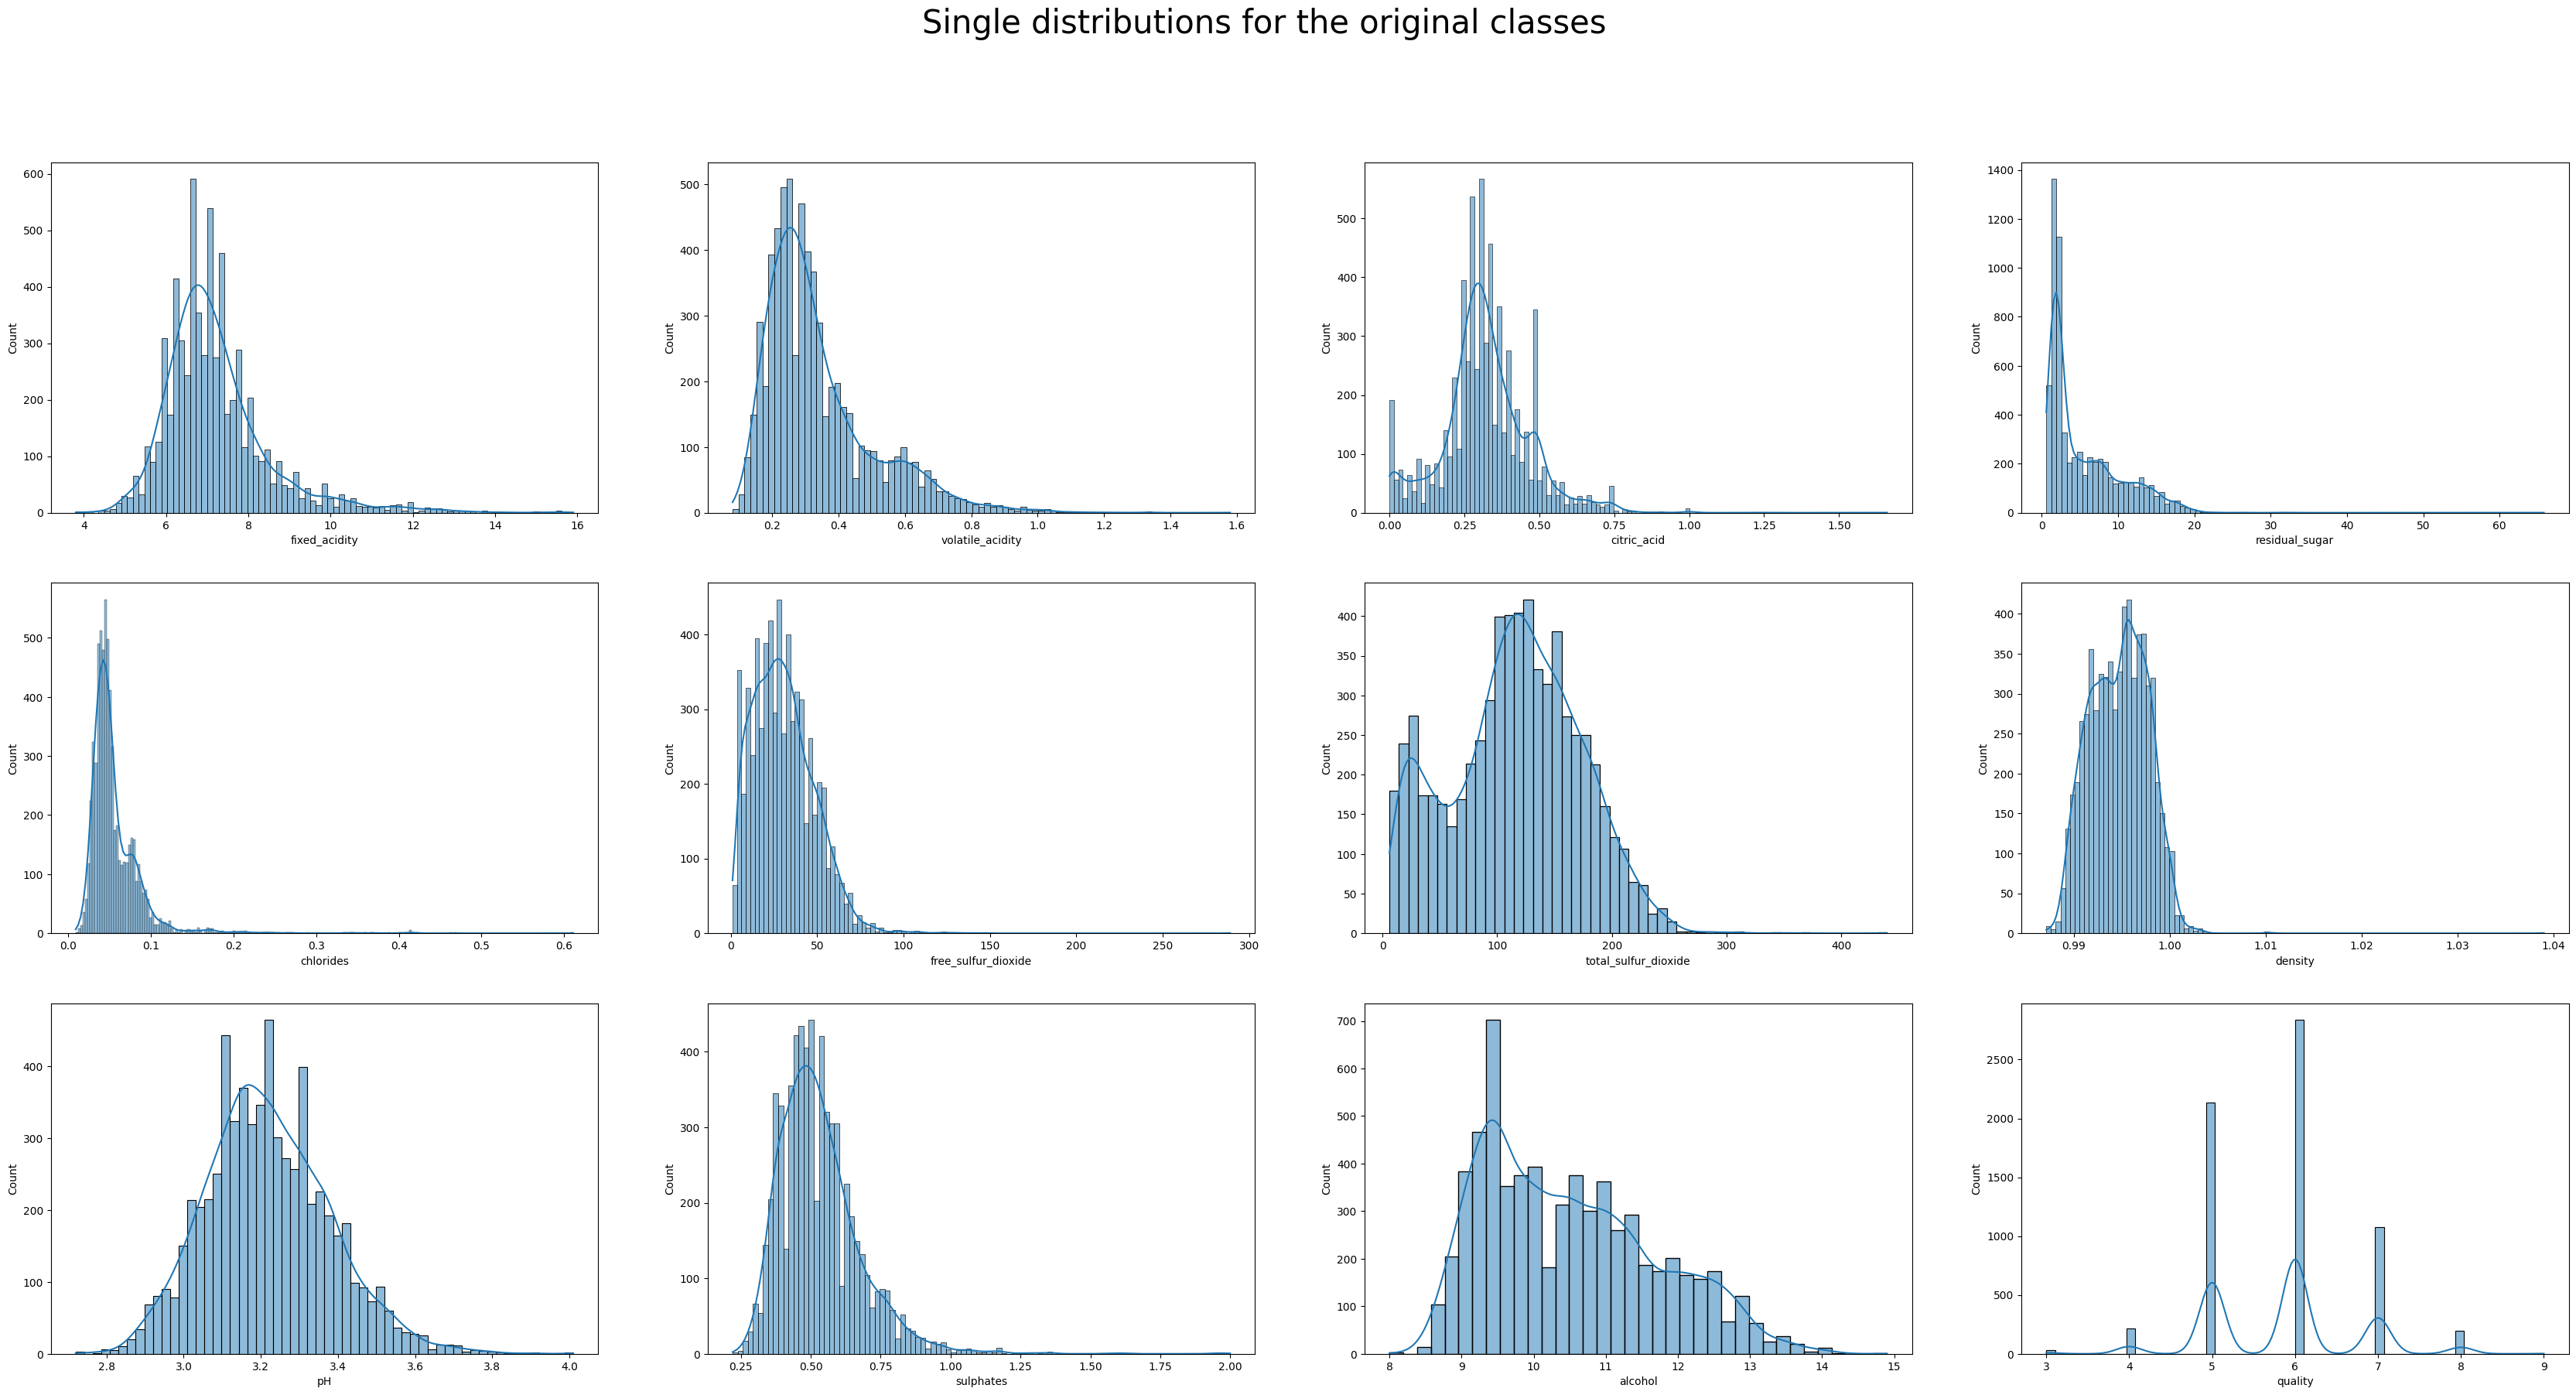

In [5]:
f, axes = plt.subplots(3, 4, figsize=(42, 20))
plt.suptitle('Single distributions for the original classes ', fontsize = '30')

sns.histplot(df['fixed_acidity'], kde = True, ax=axes[0][0])
sns.histplot(df['volatile_acidity'], kde = True, ax=axes[0][1])
sns.histplot(df['citric_acid'], kde = True, ax=axes[0][2])
sns.histplot(df['residual_sugar'], kde = True, ax=axes[0][3])
sns.histplot(df['chlorides'], kde = True, ax=axes[1][0])
sns.histplot(df['free_sulfur_dioxide'], kde = True, ax=axes[1][1])
sns.histplot(df['total_sulfur_dioxide'], kde = True, ax=axes[1][2])
sns.histplot(df['density'], kde = True, ax=axes[1][3])
sns.histplot(df['pH'], kde = True, ax=axes[2][0])
sns.histplot(df['sulphates'], kde = True, ax=axes[2][1])
sns.histplot(df['alcohol'], kde = True, ax=axes[2][2])
sns.histplot(df['quality'], kde = True, ax=axes[2][3])

<Axes: xlabel='quality_num_class', ylabel='Count'>

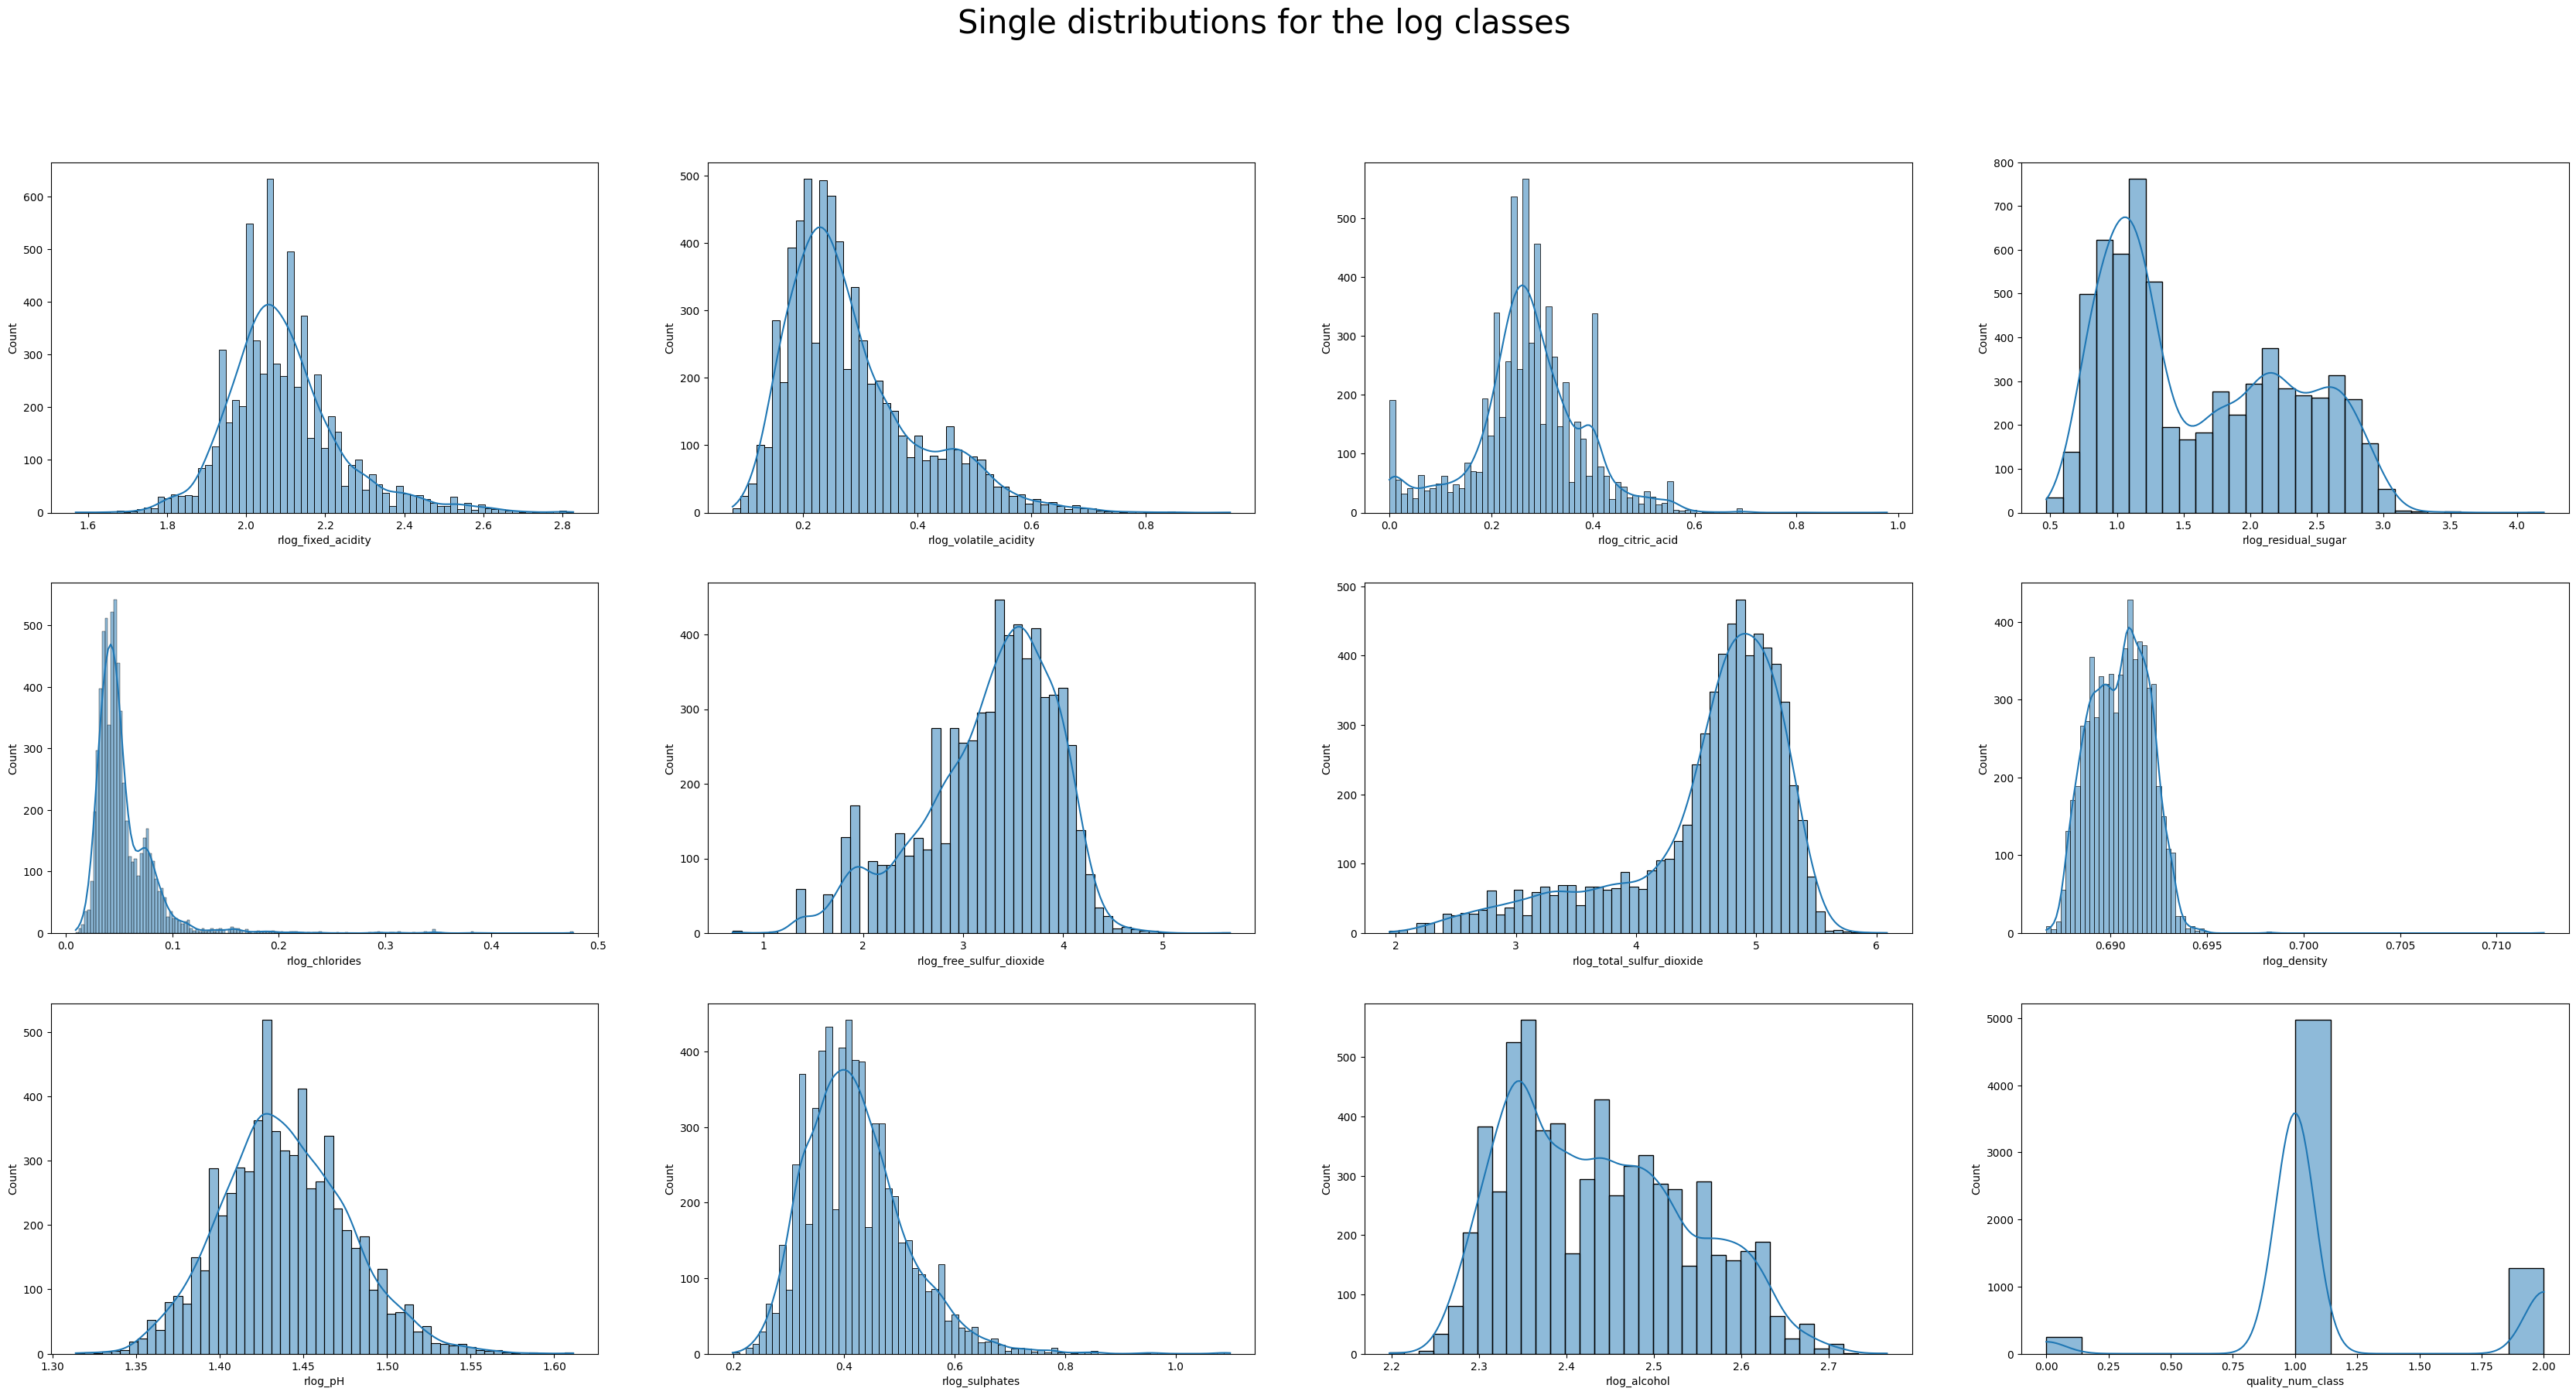

In [6]:
f, axes = plt.subplots(3, 4, figsize=(42, 20))
plt.suptitle('Single distributions for the log classes ', fontsize = '30')

sns.histplot(df['rlog_fixed_acidity'], kde = True, ax=axes[0][0])
sns.histplot(df['rlog_volatile_acidity'], kde = True, ax=axes[0][1])
sns.histplot(df['rlog_citric_acid'], kde = True, ax=axes[0][2])
sns.histplot(df['rlog_residual_sugar'], kde = True, ax=axes[0][3])
sns.histplot(df['rlog_chlorides'], kde = True, ax=axes[1][0])
sns.histplot(df['rlog_free_sulfur_dioxide'], kde = True, ax=axes[1][1])
sns.histplot(df['rlog_total_sulfur_dioxide'], kde = True, ax=axes[1][2])
sns.histplot(df['rlog_density'], kde = True, ax=axes[1][3])
sns.histplot(df['rlog_pH'], kde = True, ax=axes[2][0])
sns.histplot(df['rlog_sulphates'], kde = True, ax=axes[2][1])
sns.histplot(df['rlog_alcohol'], kde = True, ax=axes[2][2])
sns.histplot(df['quality_num_class'], kde = True, ax=axes[2][3])

Comparing the insights from the original histograms to those after the log transformation:

1. **Fixed Acidity**:
   - Original: Right-skewed distribution.
   - Log: Appears more symmetric, centered around 2.0 on the log scale.

2. **Volatile Acidity**:
   - Original: Right-skewed distribution.
   - Log: The skewness is reduced, with the peak shifting slightly to the left on the log scale.

3. **Citric Acid**:
   - Original: Right-skewed distribution.
   - Log: Still skewed, but less pronounced, indicating that while the log transformation has reduced the skewness, it remains present.

4. **Residual Sugar**:
   - Original: Heavily right-skewed with a long tail.
   - Log: The transformation has greatly reduced the skewness, and the distribution looks more normally distributed, with a peak around 1.5 on the log scale.

5. **Chlorides**:
   - Original: Right-skewed distribution.
   - Log: Less skewness is observed, although the peak is sharper on the log scale, indicating concentration around a narrow range of values.

6. **Free Sulfur Dioxide**:
   - Original: Right-skewed distribution.
   - Log: The log transformation has produced a distribution that is more symmetric, though still not perfectly normal.

7. **Total Sulfur Dioxide**:
   - Original: Right-skewed distribution.
   - Log: A significant improvement towards normality is observed after the log transformation.

8. **Density**:
   - Original: Very narrow and sharply peaked distribution.
   - Log: The peak has become less pronounced and the distribution more spread out, but it still shows a concentration of values in a narrow range.

9. **pH**:
   - Original: Relatively normally distributed.
   - Log: The distribution is slightly more symmetric around the peak, but the change is not as dramatic since the original distribution was already fairly normal.

10. **Sulphates**:
    - Original: Somewhat right-skewed.
    - Log: The skewness has been reduced, and the distribution appears more normally distributed.

11. **Alcohol**:
    - Original: Somewhat left-skewed or possibly bimodal.
    - Log: The distribution has become more symmetric, and the bimodal appearance has been reduced, suggesting that the log transformation has normalized the distribution.


The log transformation has generally improved the symmetry of the distributions, making them more suitable for analysis and/or predictive methods that assume normally distributed data, such as linear and Logistic regression. However, for some variables, the transformation has not completely normalized the distribution, indicating that other transformations or non-parametric methods might be more appropriate for those variables.

#### Multi Variable Analysis:

The correlation matrix below show two heatmaps representing the correlation matrices for a set of variables before and after a logarithmic transformation. Correlation matrices are a tool to understand the degree to which different variables are related to one another, with values ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value around 0 indicates no correlation.

##### Original Classes (Before Log Transformation)

- **Total Sulfur Dioxide & Free Sulfur Dioxide**: Shows a strong positive correlation (0.72), suggesting that wines with high levels of free sulfur dioxide also tend to have high levels of total sulfur dioxide.

- **Density & Residual Sugar**: There is a significant positive correlation (0.55), indicating that wines with higher sugar content tend to be denser.

- **Chlorides & Volatile Acidity**: Moderate positive correlation (0.38), implying that wines with higher volatile acidity levels may also have higher chloride content.

- **Citric Acid & Fixed Acidity**: There is a moderate positive correlation (0.32), suggesting that wines with higher fixed acidity also tend to have higher citric acid content.

- **Alcohol & Quality**: A moderate positive correlation (0.36) is visible, indicating that wines with higher alcohol content tend to have higher quality scores.

- **Alcohol & Density**: A strong negative correlation (-0.69), showing that higher alcohol content is associated with lower density in wines.

##### Log Classes (After Log Transformation)

- **Total Sulfur Dioxide & Free Sulfur Dioxide**: Remains strongly positive (0.78), which is consistent with the original classes, suggesting the relationship between these two variables is strong regardless of the transformation.

- **Density & Residual Sugar**:  The correlation decreased slightly but remains consistent too (0.55 to 0.51), which may imply that the log transformation has affected the linear relationship.

- **Chlorides & Volatile Acidity**: The correlation remains similar (0.4), indicating the relationship between these variables is not significantly affected by the log transformation.

- **Citric Acid & Fixed Acidity**: The correlation decreased slightly from 0.32 to 0.31, suggesting a slight change in the linear relationship after the transformation.

- **Alcohol & Quality**: The negative correlation slightly decreased  (0.36 to 0.35), which may imply that the log transformation has affected the linear relationship between alcohol content and quality.

- **Alcohol & Density**: The strong negative correlation maintained (-0.69 to -0.69), suggesting that the log transformation did not substantially change the relationship between these variables.

##### General Insights

- The log transformation has slightly increased the correlation between some pairs of variables, which may indicate that their relationship is more exponential than linear in nature.

- For some variables, the correlation has decreased after the log transformation, which might be due to the reduction of skewness and outlier effects, providing a clearer view of the underlying linear relationship.

- In both matrices, we see some variables, like chlorides, volatile acidity, and sulfates, maintaining similar levels of correlation with other variables. This suggests that the strength and direction of their relationships are robust to transformations.

- The correlation between alcohol and quality has slightly weakened after the log transformation. It is worth noting that correlation does not imply causation, and a deeper investigation would be necessary to understand the relationship between alcohol content and wine quality.

- The heatmap for the original classes appears to show stronger correlations overall compared to the heatmap for the log classes. This could indicate that certain relationships are inherently non-linear, and the log transformation could be distorting some of the original linear relationships.

When interpreting these results, it's important to remember that while correlation can indicate the presence of a relationship, it does not provide information on causality. Additionally, high correlation between two variables in predictive modeling can lead to multicollinearity, which might inflate the variance of coefficient estimates in regression models.

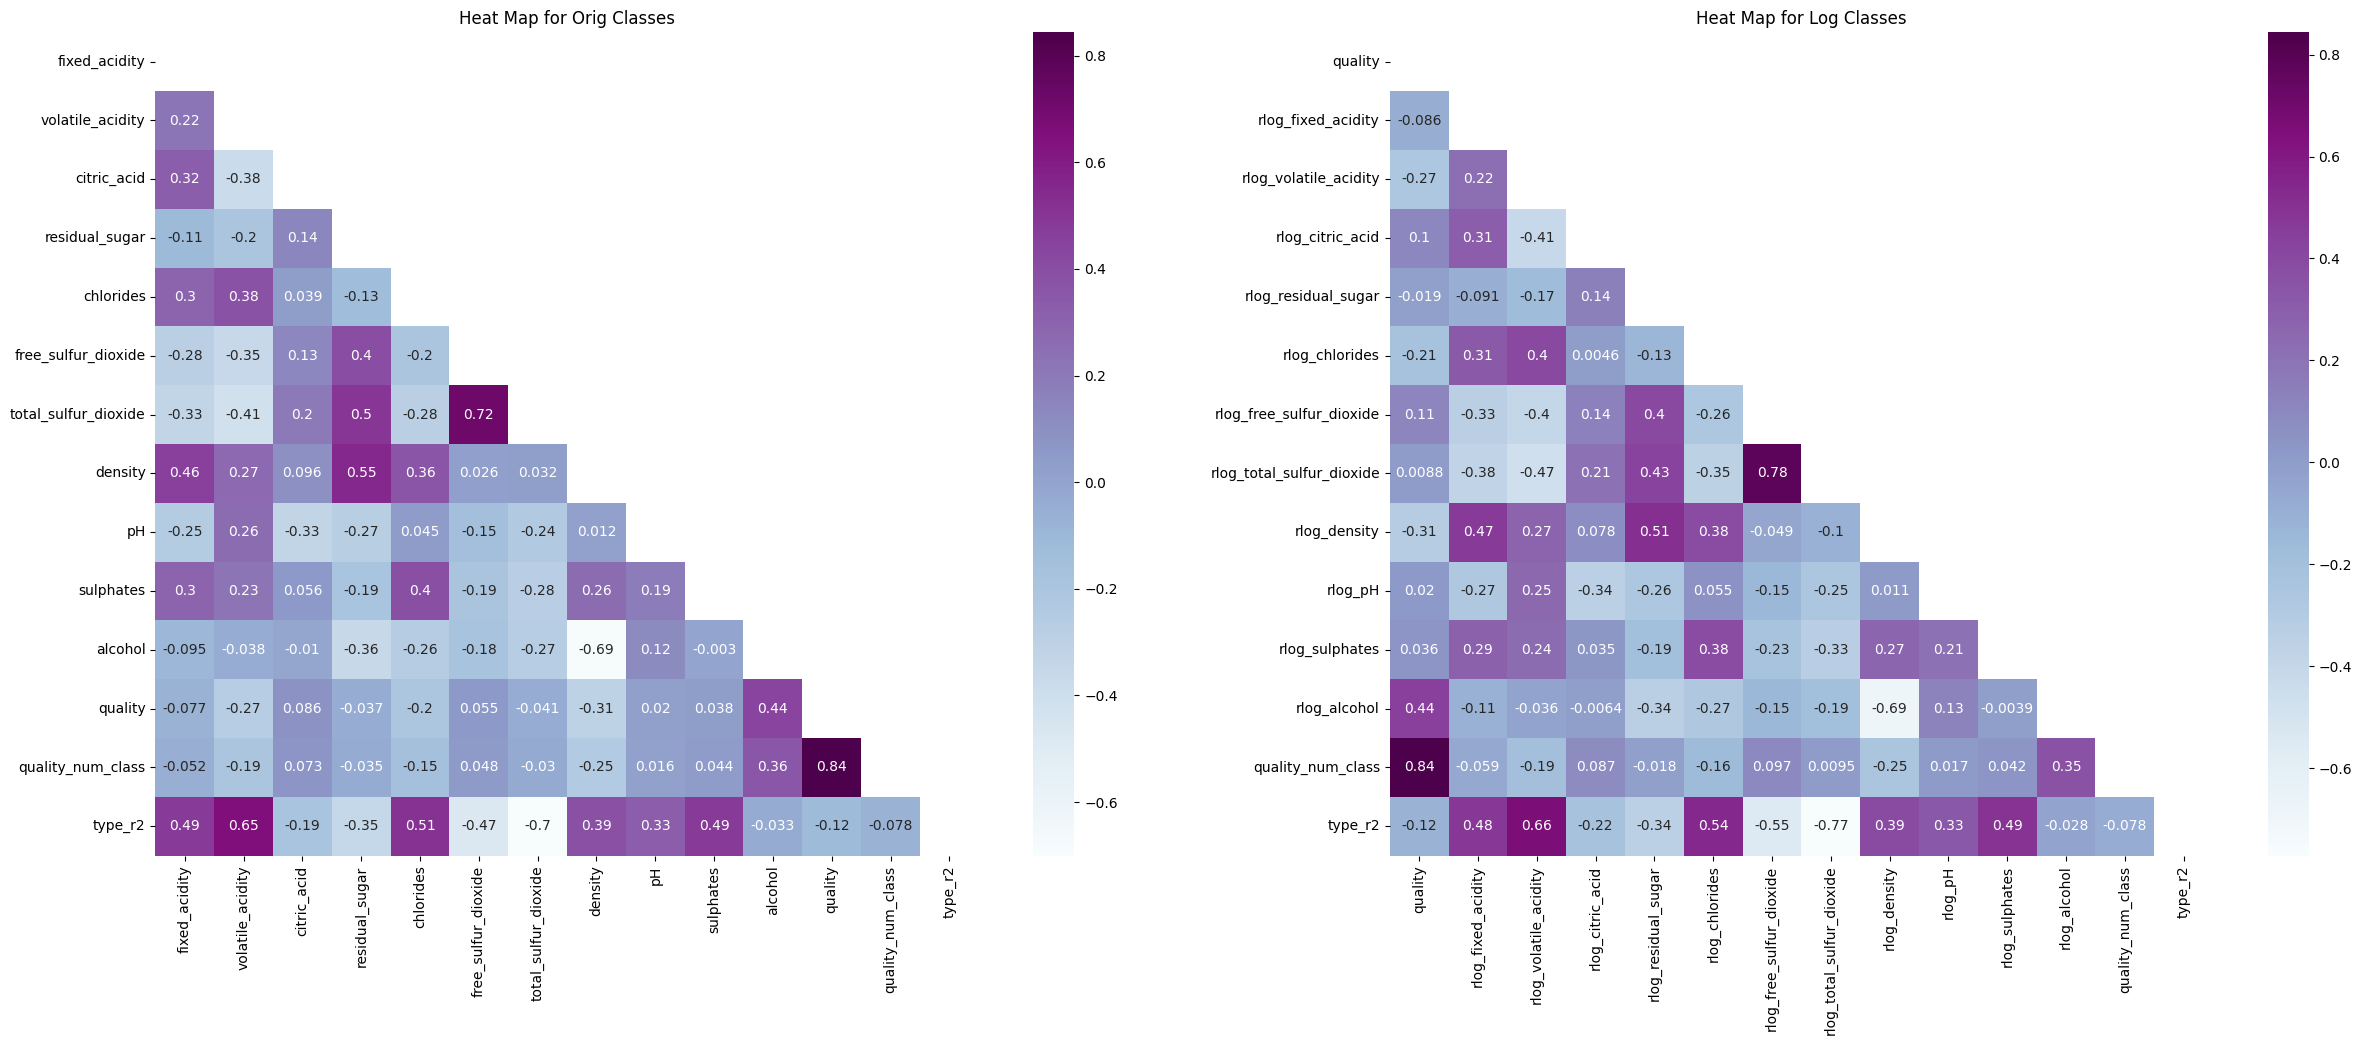

In [7]:
df_orig = df.copy()
df_orig.drop(columns=['rlog_fixed_acidity','rlog_volatile_acidity','rlog_citric_acid','rlog_residual_sugar','rlog_chlorides',
                     'rlog_free_sulfur_dioxide','rlog_total_sulfur_dioxide','rlog_density',
                     'rlog_pH','rlog_sulphates','rlog_alcohol','quality_class','type'], inplace = True)

df_log = df.copy()
df_log.drop(columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                     'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                     'alcohol','quality_class','type'], inplace = True)


mask = np.triu(np.ones_like(df_orig.corr(), dtype=bool))
mask1 = np.triu(np.ones_like(df_log.corr(), dtype=bool))

f, axes = plt.subplots(1, 2, figsize=(25, 10))
ax = sns.heatmap(df_orig.corr(), cmap='BuPu', annot=True, ax=axes[0], mask=mask, square=True)
axes[0].set_title('Heat Map for Orig Classes')

ax = sns.heatmap(df_log.corr(), cmap='BuPu', annot=True, ax=axes[1], mask=mask1, square=True)
axes[1].set_title('Heat Map for Log Classes')

plt.tight_layout()
plt.show()

These strongests correlations found related to quality:

    quality - alcohol (0.44)
    quality - density (-0.31)
    quality - volatile_acidity (-0.27)
    quality - chlorides (-0.2)

1. **Alcohol vs. Quality**:
   - There appears to be a positive trend, suggesting that wines with higher alcohol content might also have higher quality ratings. This could be due to various factors, such as the perception of mouthfeel, body, or balance that alcohol can contribute to wine.

2. **Density vs. Quality**:
   - The plot indicates a slight negative trend between density and quality. This could suggest that higher quality wines have lower density, which might be associated with a higher alcohol content since alcohol is less dense than water.

3. **Volatile Acidity vs. Quality**:
   - There's a negative trend visible, indicating that as volatile acidity increases, the quality rating tends to decrease. Volatile acidity, which includes acetic acid, can lead to undesirable flavors at higher concentrations.

4. **Chlorides vs. Quality**:
   - The relationship between chlorides and quality also shows a negative trend, albeit the data points are quite spread out. High levels of chlorides can be associated with salty taste and may also be indicative of certain winemaking processes or grape growing conditions that don't align with higher quality ratings.

General Observations:

- Discrete Nature of Quality Class

- **Spread of Data Points**: For all four chemical properties, there's considerable variability at each level of quality, which indicates that there are other factors not captured by these variables alone that contribute to the quality of wine.

- **Outliers**: There are several outliers, particularly in the plots for volatile acidity and chlorides. These could be wines with unusual chemical profiles or possibly data recording errors.

- **Regression Lines**: The regression lines provide a general trend but with the scatter of points around the lines, it suggests that the relationships are not perfect and other variables or non-linear relationships may also be important.

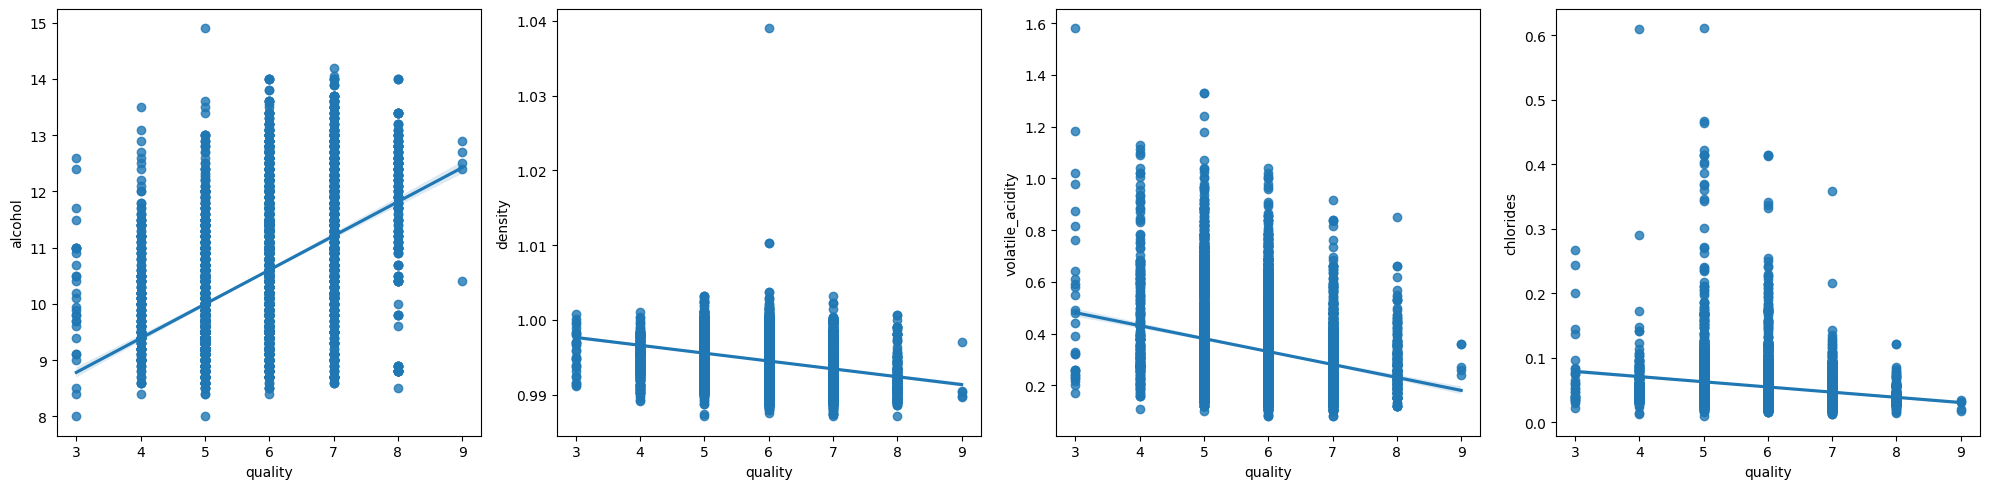

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(data=df, x="quality", y="alcohol", ax=axs[0])
sns.regplot(data=df, x="quality", y="density", ax=axs[1])
sns.regplot(data=df, x="quality", y="volatile_acidity", ax=axs[2])
sns.regplot(data=df, x="quality", y="chlorides", ax=axs[3])

plt.tight_layout()
plt.show()

Text(0.5, 0.95, 'Wine Quality Relation vs Alcohol / Density / Volatile Acidity / Chlorides')

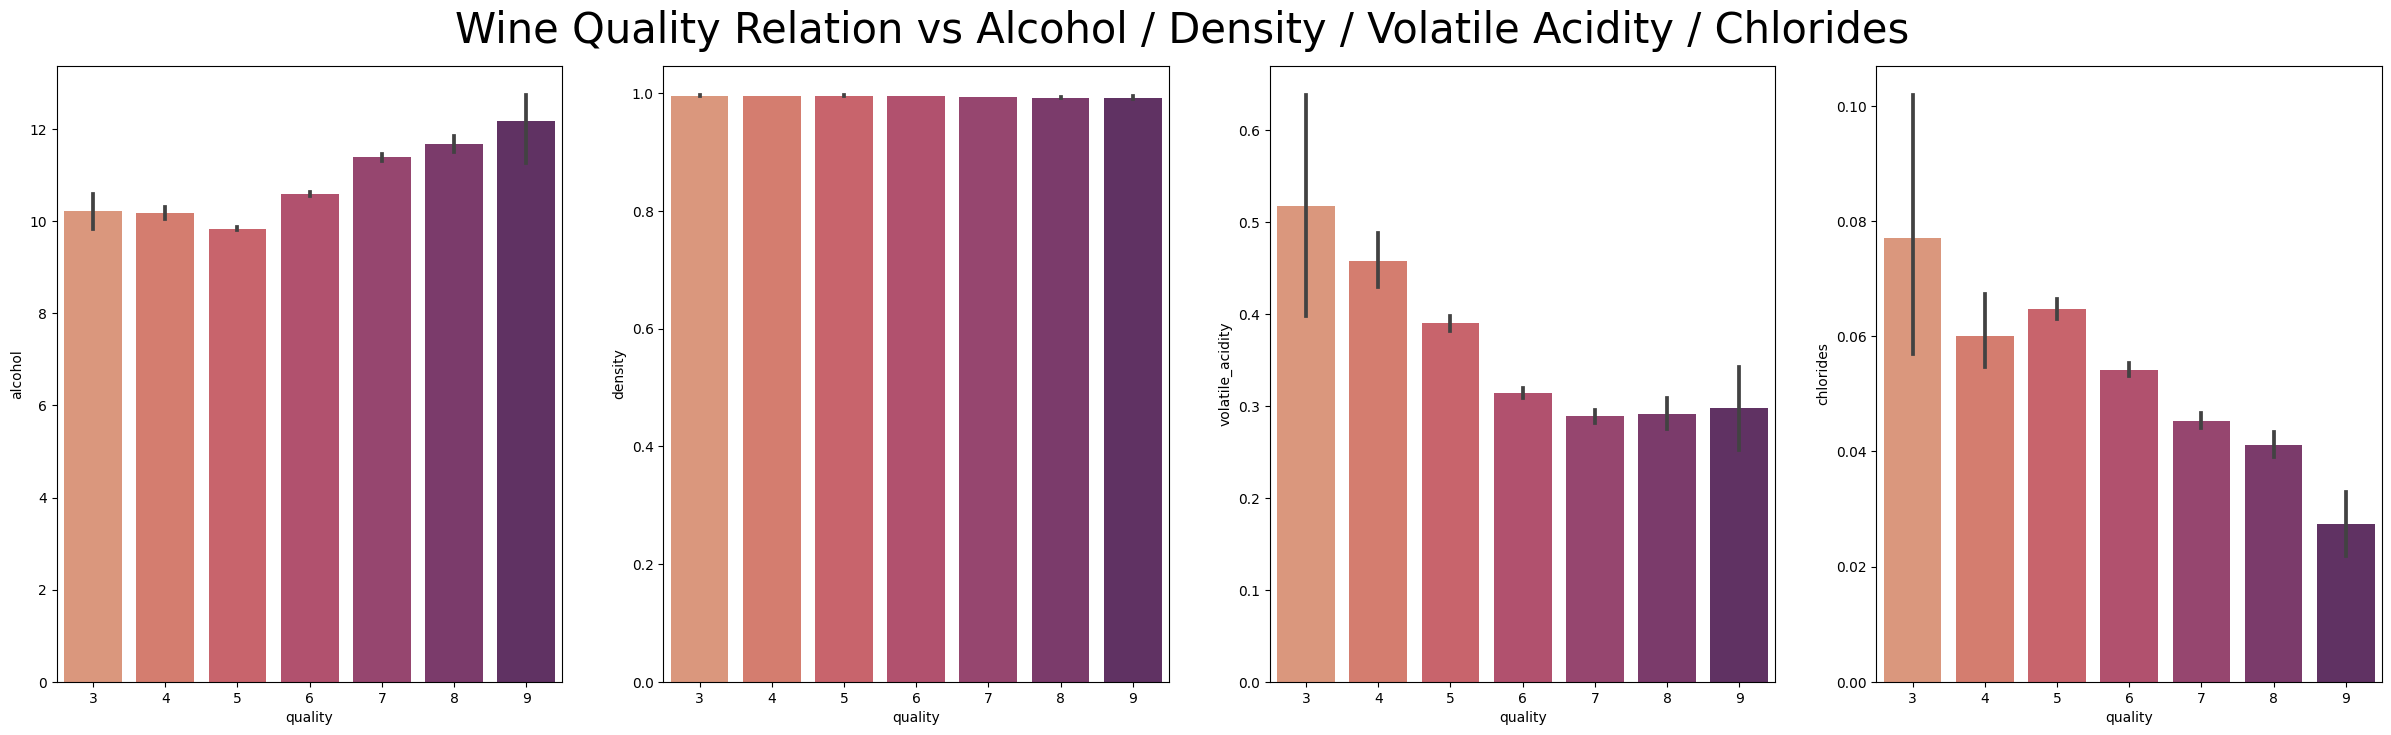

In [9]:
f, axes = plt.subplots(1, 4, figsize=(30, 8))

sns.barplot(x = 'quality', y = 'alcohol', data = df,  ax=axes[0], palette = 'flare')
sns.barplot(x = 'quality', y = 'density', data = df,  ax=axes[1], palette = 'flare')
sns.barplot(x = 'quality', y = 'volatile_acidity', data = df,  ax=axes[2], palette = 'flare')
sns.barplot(x = 'quality', y = 'chlorides', data = df,  ax=axes[3], palette = 'flare')

plt.suptitle('Wine Quality Relation vs Alcohol / Density / Volatile Acidity / Chlorides', x=0.5, y=0.95, ha='center', fontsize='30')


These sets of variables seems to have more than meaningful correlation (> +0.2) or (> -0.2).
Thes strongests correlations found:

Positive:

    total_sulfur_dioxide - free_sulfur_dioxide (0.72)
    residual_sugar - density (0.55)
    residual_sugar - total_sulfur_dioxide (0.50)
    fixed_acidity - density (0.46)
    residual_sugar - free_sulfur_dioxide (0.40)
    chlorides - sulphates (0.40)
    chlorides - volatile_acidity (0.38)
    chlorides - density (0.36)
    chlorides - fixed_acidity (0.30)


Negative:

    Alcohol - density (-0.69)
    total_sulfur_dioxide - volatile_acidity (-0.41)
    free_sulfur_dioxide - volatile_acidity (-0.35)
    ph - citric_acid (-0.33)
    Alcohol - residual_sugar (-0.36)


The correlations highlighted can offer several insights into the relationships between different wine characteristics. Here are some interpretations:

##### **Positive Correlations**

1. **Total Sulfur Dioxide & Free Sulfur Dioxide (0.72)**:
    - These two features are directly related because total sulfur dioxide is the sum of free sulfur dioxide and bound sulfur dioxide. A higher amount of free sulfur dioxide will naturally increasethe total sulfur dioxide content.
2. **Residual Sugar & Density (0.55)**:
    - Wines with higher residual sugar content typically have higher density. This makes sense because sugar increases the specific gravity of the liquid.
3. **Residual Sugar & Total Sulfur Dioxide (0.50)**:
    - This could indicate that wines with more residual sugar (perhaps sweeter wines) may require more sulfur dioxide to prevent oxidation and spoilage since sugar can be a nutrient for unwantedmicrobes.
4. **Fixed Acidity & Density (0.46)**:
    - This suggests that more acidic wines tend to be denser, possibly because acidity may be associated with higher levels of other components that contribute to density.
5. **Residual Sugar & Free Sulfur Dioxide (0.40)**:
    - Similar to the correlation with total sulfur dioxide, wines with higher residual sugar might have more free sulfur dioxide, possibly due to winemakers adding more to prevent spoilage insweeter wines.
6. **Chlorides & Sulphates (0.40)**:
    - Chlorides and sulphates are both components of salts found in wine. This relationship could suggest a shared source or similar factors influencing their presence.
7. **Chlorides & Volatile Acidity (0.38)**:
    - Volatile acidity, which is mostly acetic acid, can increase with certain winemaking practices. The correlation with chlorides might suggest a shared influence from these practices or commonenvironmental factors.
8. **Chlorides & Density (0.36)**:
    - Higher levels of chlorides could contribute to the overall mineral content, thus increasing the wine's density.
9. **Chlorides & Fixed Acidity (0.30)**:
    - This relationship might be due to the natural variation in the grapes' or the soil's mineral content, which can affect both acidity and chloride levels.

##### **Negative Correlations**

1. **Alcohol & Density (-0.69)**:
    - As alcohol content increases, the density of the wine typically decreases since alcohol is less dense than water. This is a well-known inverse relationship.
2. **Total Sulfur Dioxide & Volatile Acidity (-0.41)**:
    - Higher levels of sulfur dioxide could be effective at controlling the bacterial growth that leads to volatile acidity, hence the negative correlation.
3. **Free Sulfur Dioxide & Volatile Acidity (-0.35)**:
    - Similar to total sulfur dioxide, more free sulfur dioxide might reduce volatile acidity by inhibiting the growth of acetic acid bacteria.
4. **pH & Citric Acid (-0.33)**:
    - Citric acid is one of the acids that contribute to the overall acidity of the wine. As the concentration of citric acid goes up, the pH goes down, reflecting higher acidity.
5. **Alcohol & Residual Sugar (-0.36)**:
    - Wines that undergo more complete fermentation will convert more sugar to alcohol, resulting in lower residual sugar. Conversely, wines that are intended to be sweeter may be fortified with alcohol, stopping the fermentation early and retaining more sugar.


The type of wine has a big impact on all the features, both positively and negatively, with alcohol having the least impact.

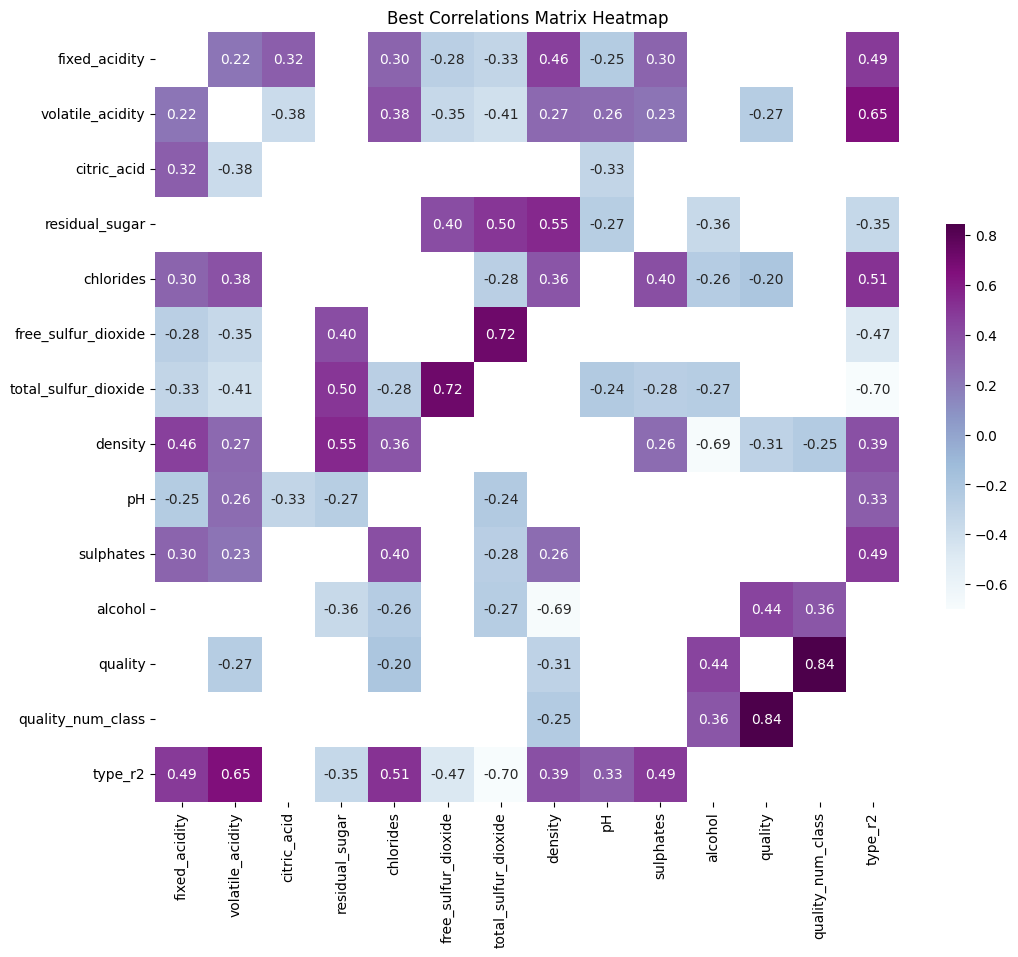

In [10]:
correlation_matrix = df_orig.corr()

filtered_corr = correlation_matrix[(correlation_matrix > 0.2) | (correlation_matrix < -0.2)]

for i in range(len(filtered_corr)):
    filtered_corr.iloc[i, i] = np.nan

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='BuPu', cbar_kws={"shrink": .5})
plt.title('Best Correlations Matrix Heatmap')
plt.show()

The relationship and insights between the below two different variables are:

1. **Density vs. Residual Sugar**: Shows a slight increase in density with higher residual sugar levels.
2. **Total Sulfur Dioxide vs. Residual Sugar**: Indicates a positive correlation, where wines with more residual sugar tend to have higher amounts of total sulfur dioxide.
3. **Free Sulfur Dioxide vs. Residual Sugar**: Also suggests a positive relationship, with higher residual sugar associated with more free sulfur dioxide.
4. **Density vs. Fixed Acidity**: There seems to be a positive correlation, where wines with higher fixed acidity are denser.
5. **Sulphates vs. Chlorides**: Displays a positive correlation, indicating that wines with more chlorides tend to have higher sulphate levels.
6. **Volatile Acidity vs. Chlorides**: Shows a positive correlation, suggesting that wines with more chlorides tend to have higher volatile acidity.
7. **Density vs. Chlorides**: Depicts a positive relationship, where higher chloride content is associated with higher density.
8. **Fixed Acidity vs. Chlorides**: Indicates a positive relationship, with higher chloride levels corresponding to higher fixed acidity.
9. **Density vs. Alcohol**: Shows a negative correlation, where higher alcohol levels are associated with lower density.
10. **Volatile Acidity vs. Total Sulfur Dioxide**: Displays a positive correlation, where wines with more total sulfur dioxide tend to have higher volatile acidity.
11. **Citric Acid vs. pH**: Indicates a negative correlation, with higher pH levels associated with lower citric acid content.
12. **Residual Sugar vs. Alcohol**: Shows a negative correlation, suggesting that wines with higher alcohol content tend to have lower residual sugar.

Each plot includes a regression line with a confidence interval, providing a visual indication of the strength and direction of the relationship between the variables. The closer the data points are to the line, the stronger the relationship. If the confidence bands are narrow, it means there's a higher level of certainty about the regression line's slope.

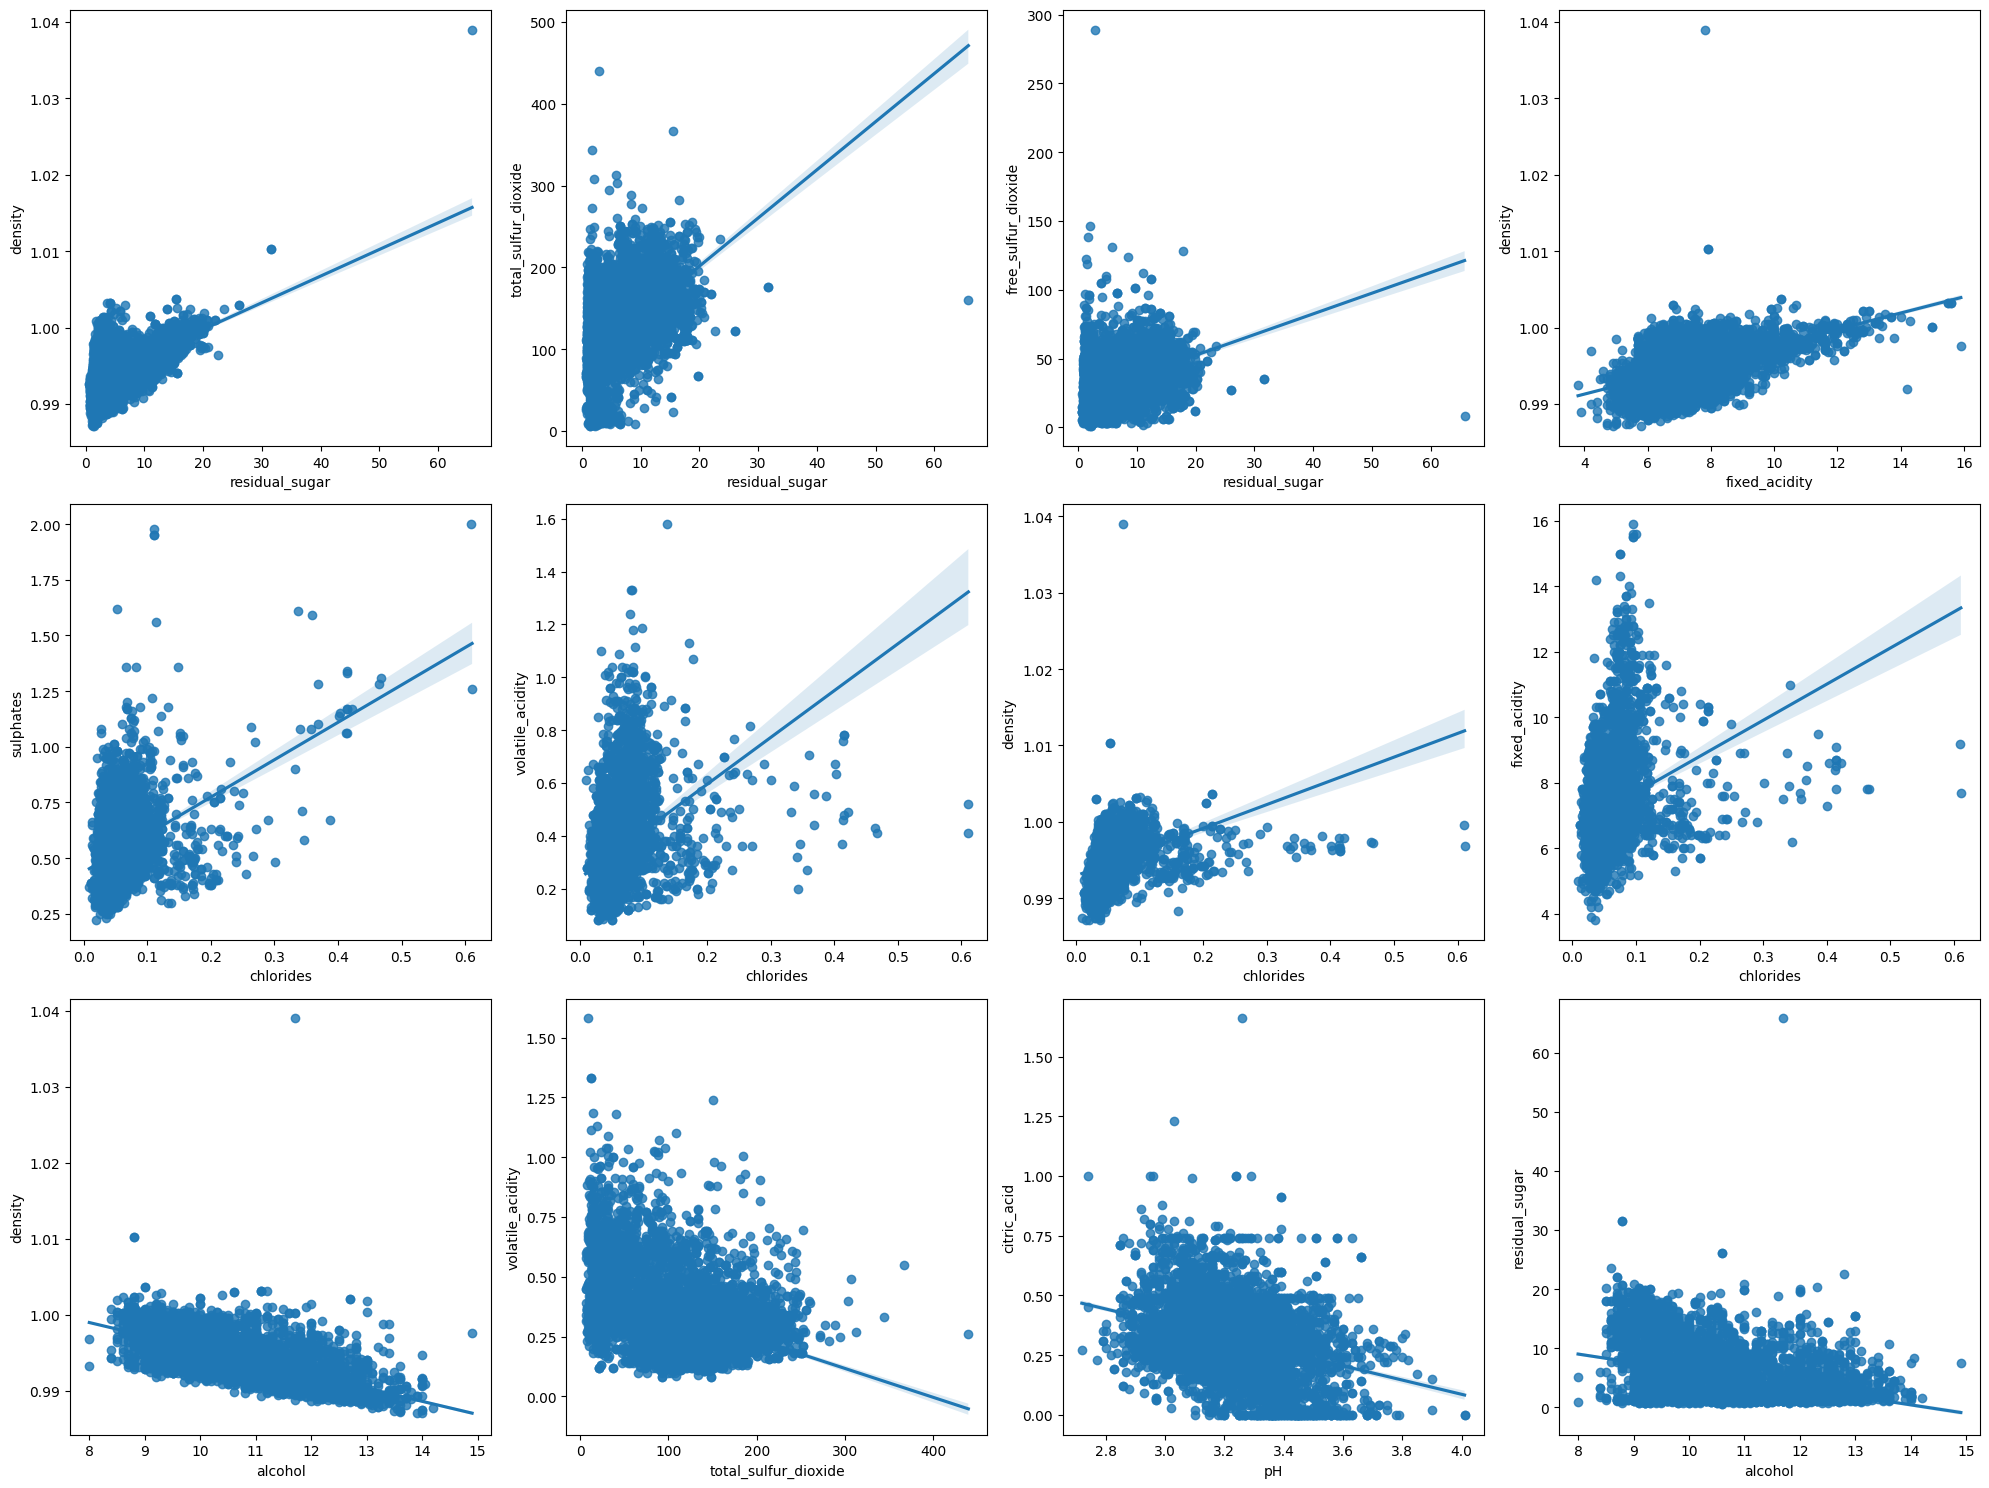

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

sns.regplot(data=df, x="residual_sugar", y="density", ax=axs[0][0])
sns.regplot(data=df, x="residual_sugar", y="total_sulfur_dioxide", ax=axs[0][1])
sns.regplot(data=df, x="residual_sugar", y="free_sulfur_dioxide", ax=axs[0][2])
sns.regplot(data=df, x="fixed_acidity", y="density", ax=axs[0][3])

sns.regplot(data=df, x="chlorides", y="sulphates", ax=axs[1][0])
sns.regplot(data=df, x="chlorides", y="volatile_acidity", ax=axs[1][1])
sns.regplot(data=df, x="chlorides", y="density", ax=axs[1][2])
sns.regplot(data=df, x="chlorides", y="fixed_acidity", ax=axs[1][3])

sns.regplot(data=df, x="alcohol", y="density", ax=axs[2][0])
sns.regplot(data=df, x="total_sulfur_dioxide", y="volatile_acidity", ax=axs[2][1])
sns.regplot(data=df, x="pH", y="citric_acid", ax=axs[2][2])
sns.regplot(data=df, x="alcohol", y="residual_sugar", ax=axs[2][3])

plt.tight_layout()
plt.show()

#### Analyzing each type of wine individually:

In [12]:
df_red = df[(df['type'] == 'red')]
df_white = df[(df['type'] == 'white')]

### Red Wine

1. **Orig Classes**: 
    - There is a strong positive correlation (0.67) between fixed acidity -> citric acid, density.
    - Quality shows a moderate positive correlation with alcohol (0.48) and a moderate negative correlation with volatile acidity (-0.39).
    - Total sulfur dioxide has a high positive correlation with free sulfur dioxide (0.67).

2. **Log Classes**:
    - The log transformation seems to have affected the correlations, as we see different values compared to the Orig Classes heatmap.
    - The correlation between quality and alcohol is relative stronger in the log-transformed data (0.49).
    - Quality maintaned thi moderate negative correlation with volatile acidity(-0.39) and increased with sulphates(0.28).

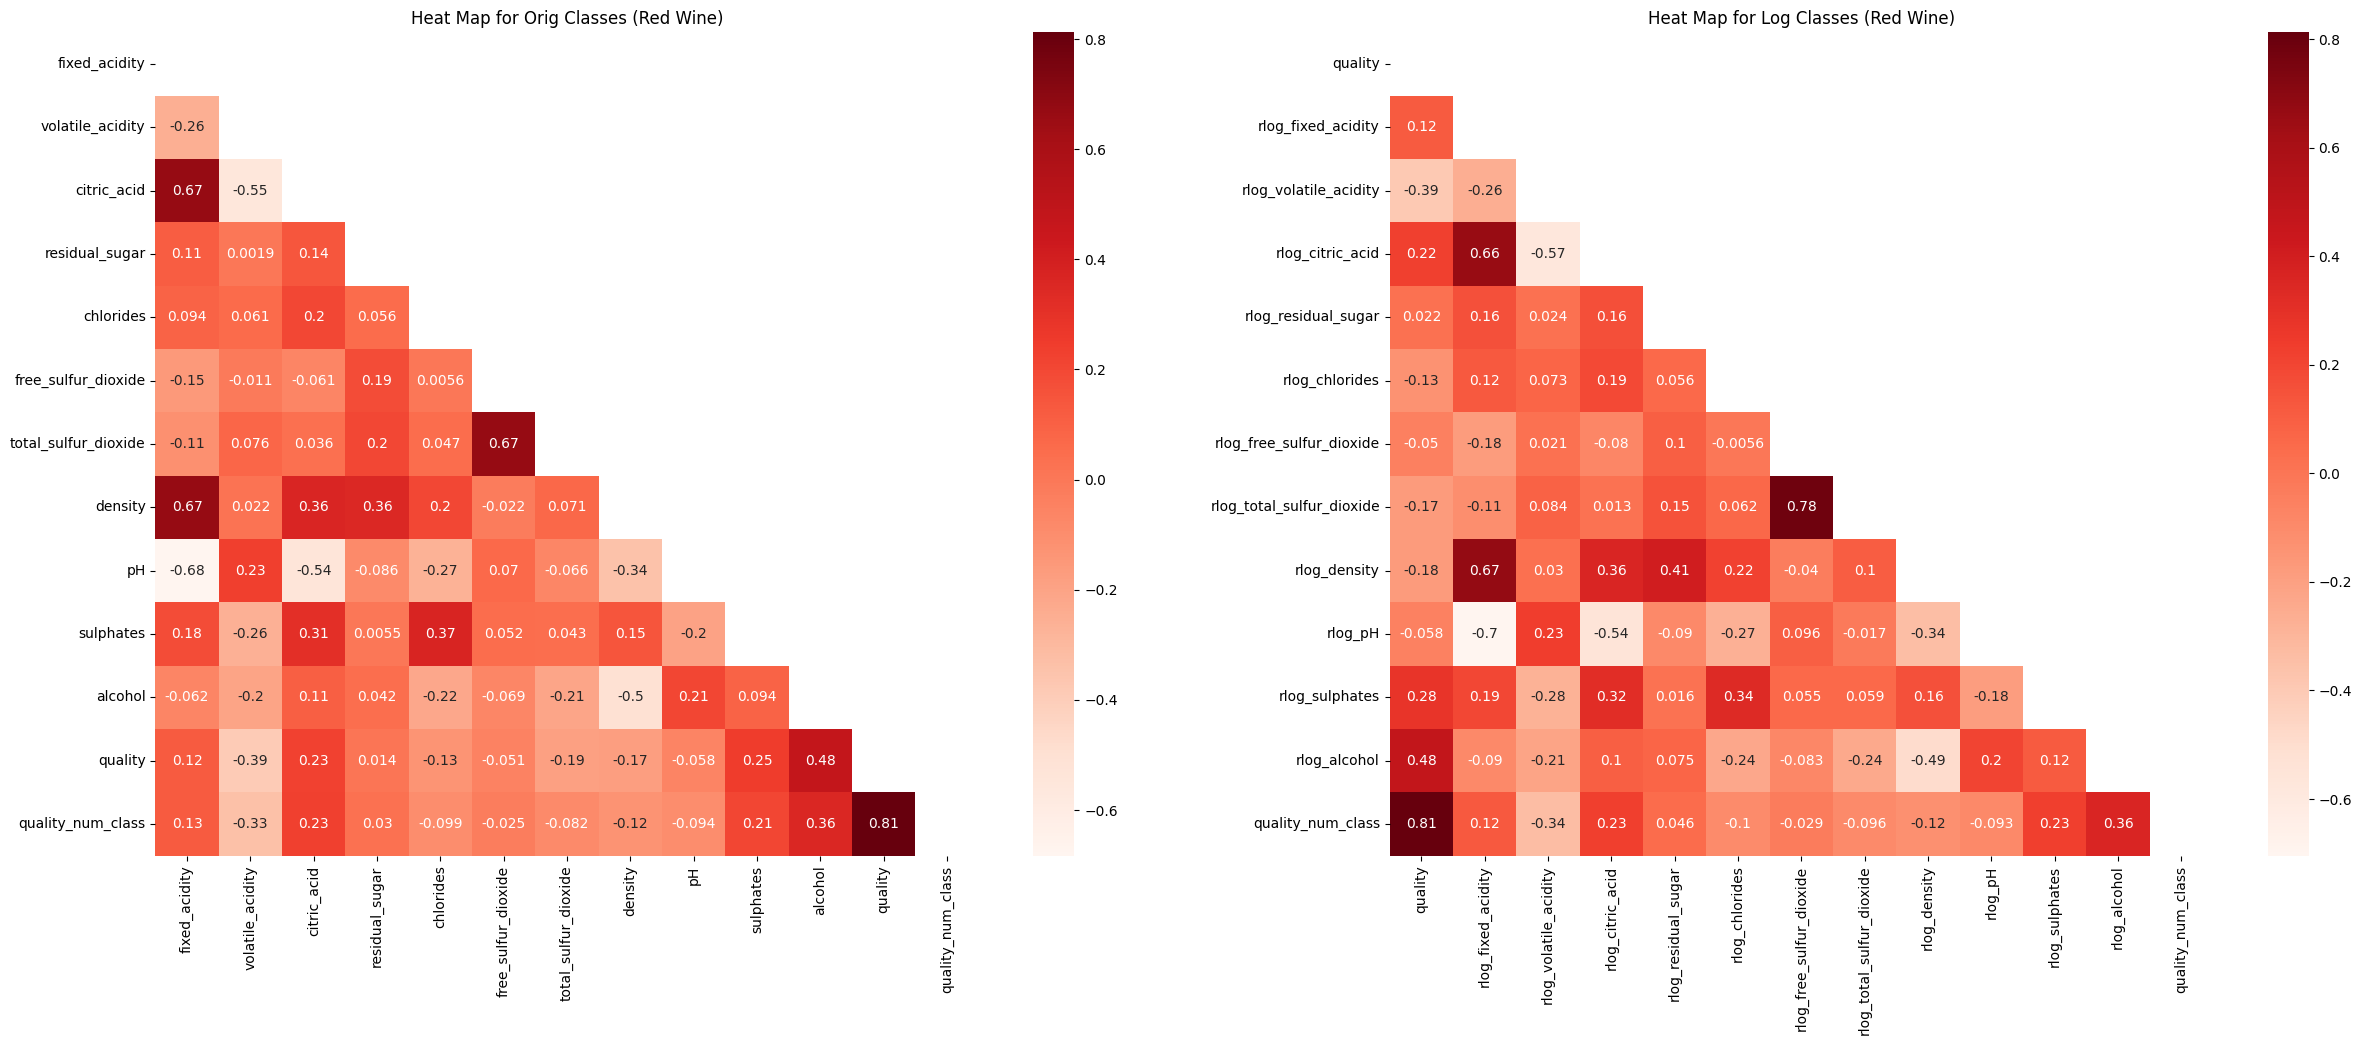

In [13]:
df_orig_r = df_red.copy()
df_orig_r.drop(columns=['rlog_fixed_acidity','rlog_volatile_acidity','rlog_citric_acid','rlog_residual_sugar','rlog_chlorides',
                     'rlog_free_sulfur_dioxide','rlog_total_sulfur_dioxide','rlog_density',
                     'rlog_pH','rlog_sulphates','rlog_alcohol','quality_class','type','type_r2'], inplace = True)

df_log_r = df_red.copy()
df_log_r.drop(columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                     'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                     'alcohol','quality_class','type','type_r2'], inplace = True)


mask = np.triu(np.ones_like(df_orig_r.corr(), dtype=bool))
mask1 = np.triu(np.ones_like(df_log_r.corr(), dtype=bool))

f, axes = plt.subplots(1, 2, figsize=(25, 10))
ax = sns.heatmap(df_orig_r.corr(), cmap='Reds', annot=True, ax=axes[0], mask=mask, square=True)
axes[0].set_title('Heat Map for Orig Classes (Red Wine)')

ax = sns.heatmap(df_log_r.corr(), cmap='Reds', annot=True, ax=axes[1], mask=mask1, square=True)
axes[1].set_title('Heat Map for Log Classes (Red Wine)')

plt.tight_layout()
plt.show()

### White Wine

1. **Orig Classes**: 
    - Density shows a very strong positive correlation with residual sugar (0.84), which is expected as sugars increase the density of the wine.
    - Quality has a moderate negative correlation with density (-0.31) and a strong positive correlation with alcohol (0.44).

2. **Log Classes**:
    - Again, log transformation changes the correlation landscape. Quality maintained the values with log_density (-0.31) and a strong positive correlation with log_alcohol (0.43).

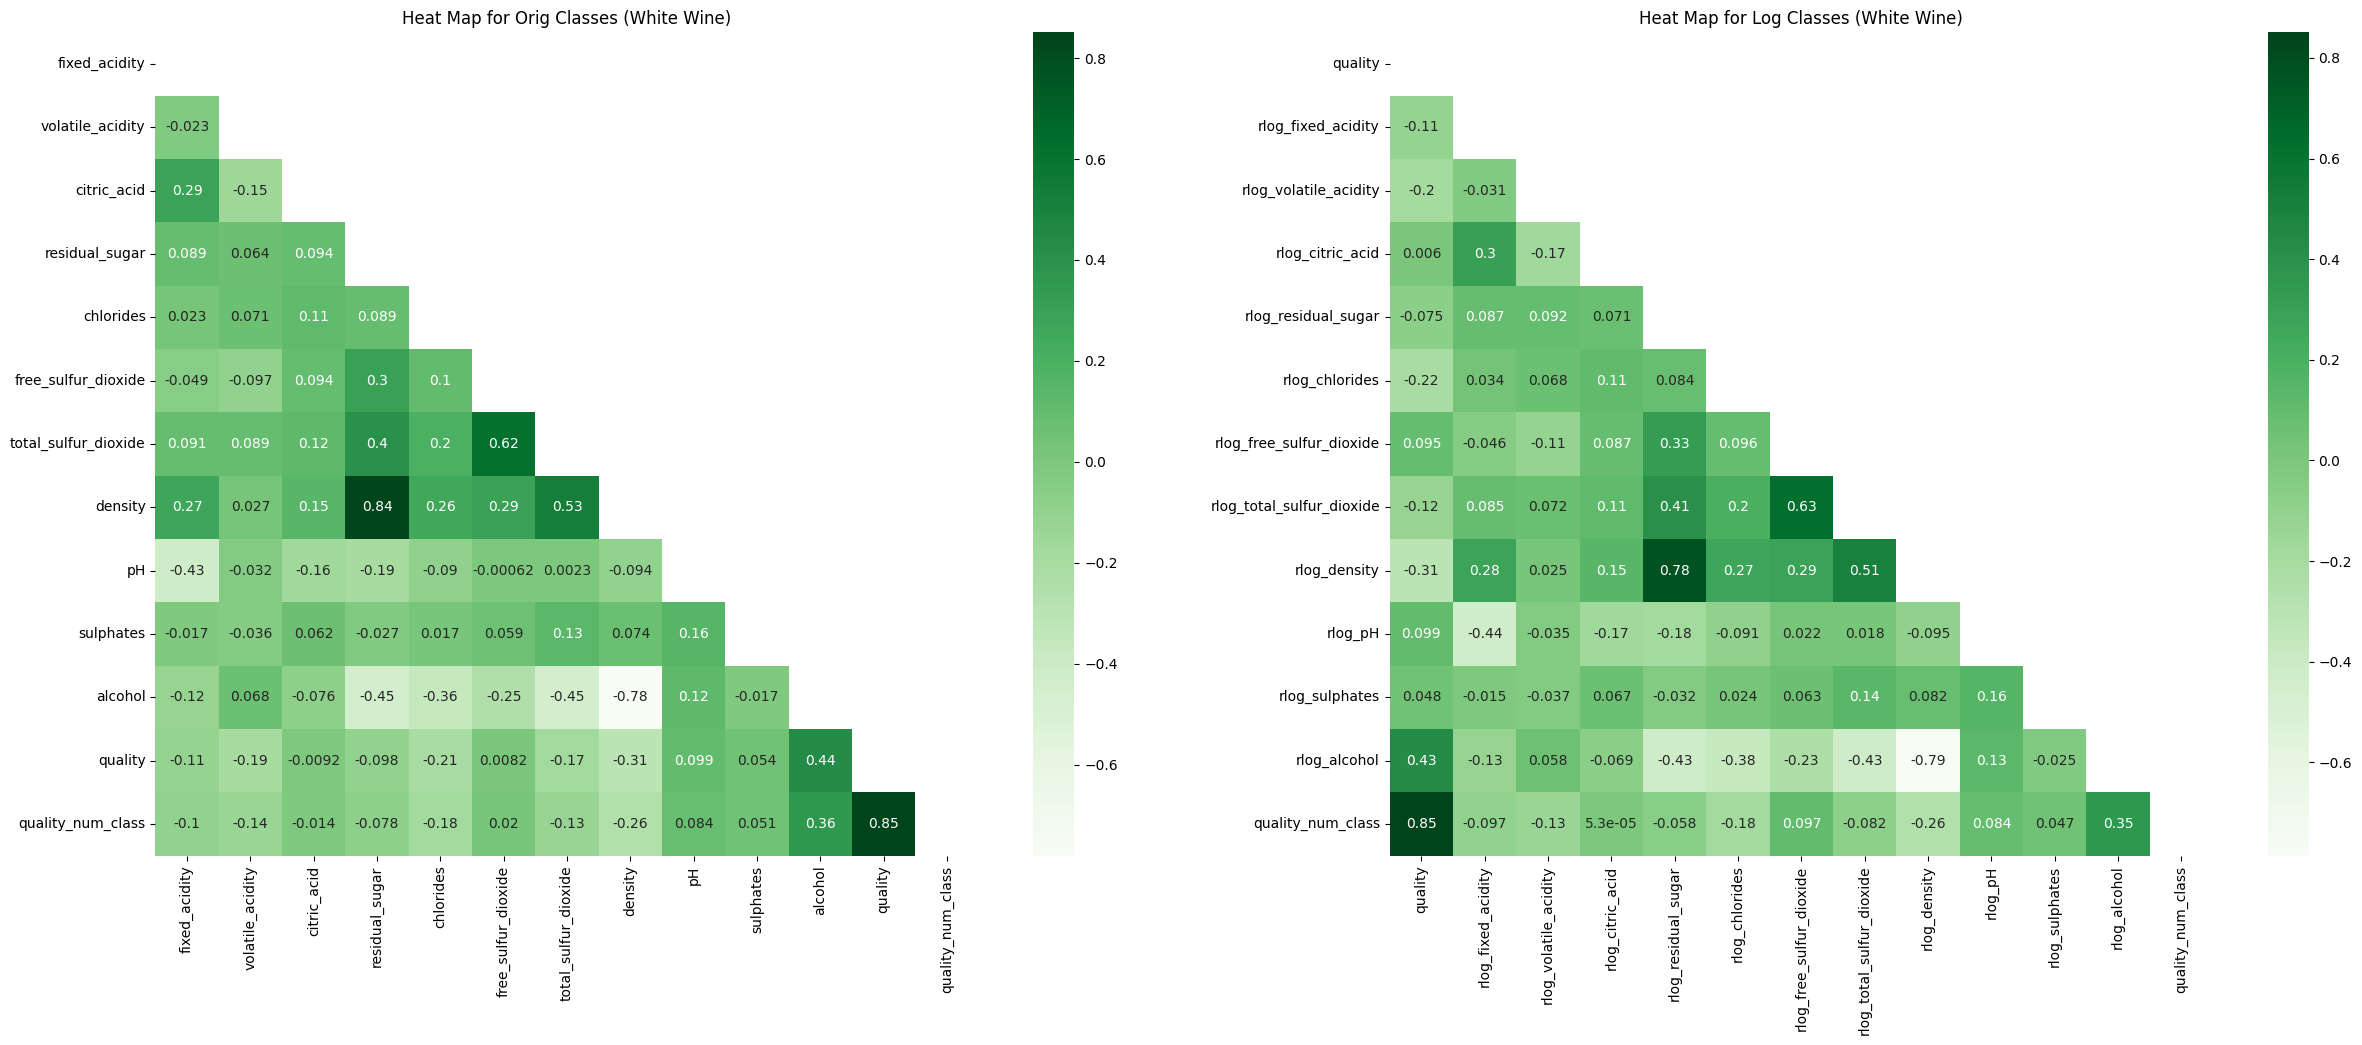

In [14]:
df_orig_w = df_white.copy()
df_orig_w.drop(columns=['rlog_fixed_acidity','rlog_volatile_acidity','rlog_citric_acid','rlog_residual_sugar','rlog_chlorides',
                     'rlog_free_sulfur_dioxide','rlog_total_sulfur_dioxide','rlog_density',
                     'rlog_pH','rlog_sulphates','rlog_alcohol','quality_class','type','type_r2'], inplace = True)

df_log_w = df_white.copy()
df_log_w.drop(columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                     'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                     'alcohol','quality_class','type','type_r2'], inplace = True)


mask = np.triu(np.ones_like(df_orig_w.corr(), dtype=bool))
mask1 = np.triu(np.ones_like(df_log_w.corr(), dtype=bool))

f, axes = plt.subplots(1, 2, figsize=(25, 10))
ax = sns.heatmap(df_orig_w.corr(), cmap='Greens', annot=True, ax=axes[0], mask=mask, square=True)
axes[0].set_title('Heat Map for Orig Classes (White Wine)')

ax = sns.heatmap(df_log_w.corr(), cmap='Greens', annot=True, ax=axes[1], mask=mask1, square=True)
axes[1].set_title('Heat Map for Log Classes (White Wine)')

plt.tight_layout()
plt.show()

In [15]:
df_orig_r.corr()[['quality']].sort_values(by='quality', ascending = False) # Red Wine

,quality
quality,1.000000
quality_num_class,0.812367
alcohol,0.476166
sulphates,0.251397
citric_acid,0.226373
fixed_acidity,0.124052
residual_sugar,0.013732
free_sulfur_dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907


The best features related to red wine are alcohol, sulphates, citric_acid, volatile_acidity.

**CONCLUSIONS**
* There is an increasing tendency for alcohol to affect the quality of red wine.
* There is a moderate trend for sulphites in the quality of red wine, despite the moderate correlation.
* There is an increasing trend for citric acidity in the quality of red wine.
* There is a decreasing trend for volatile acidity in the quality of red wine.


Text(0.5, 0.95, 'Red Wine Quality Relation vs Best Features')

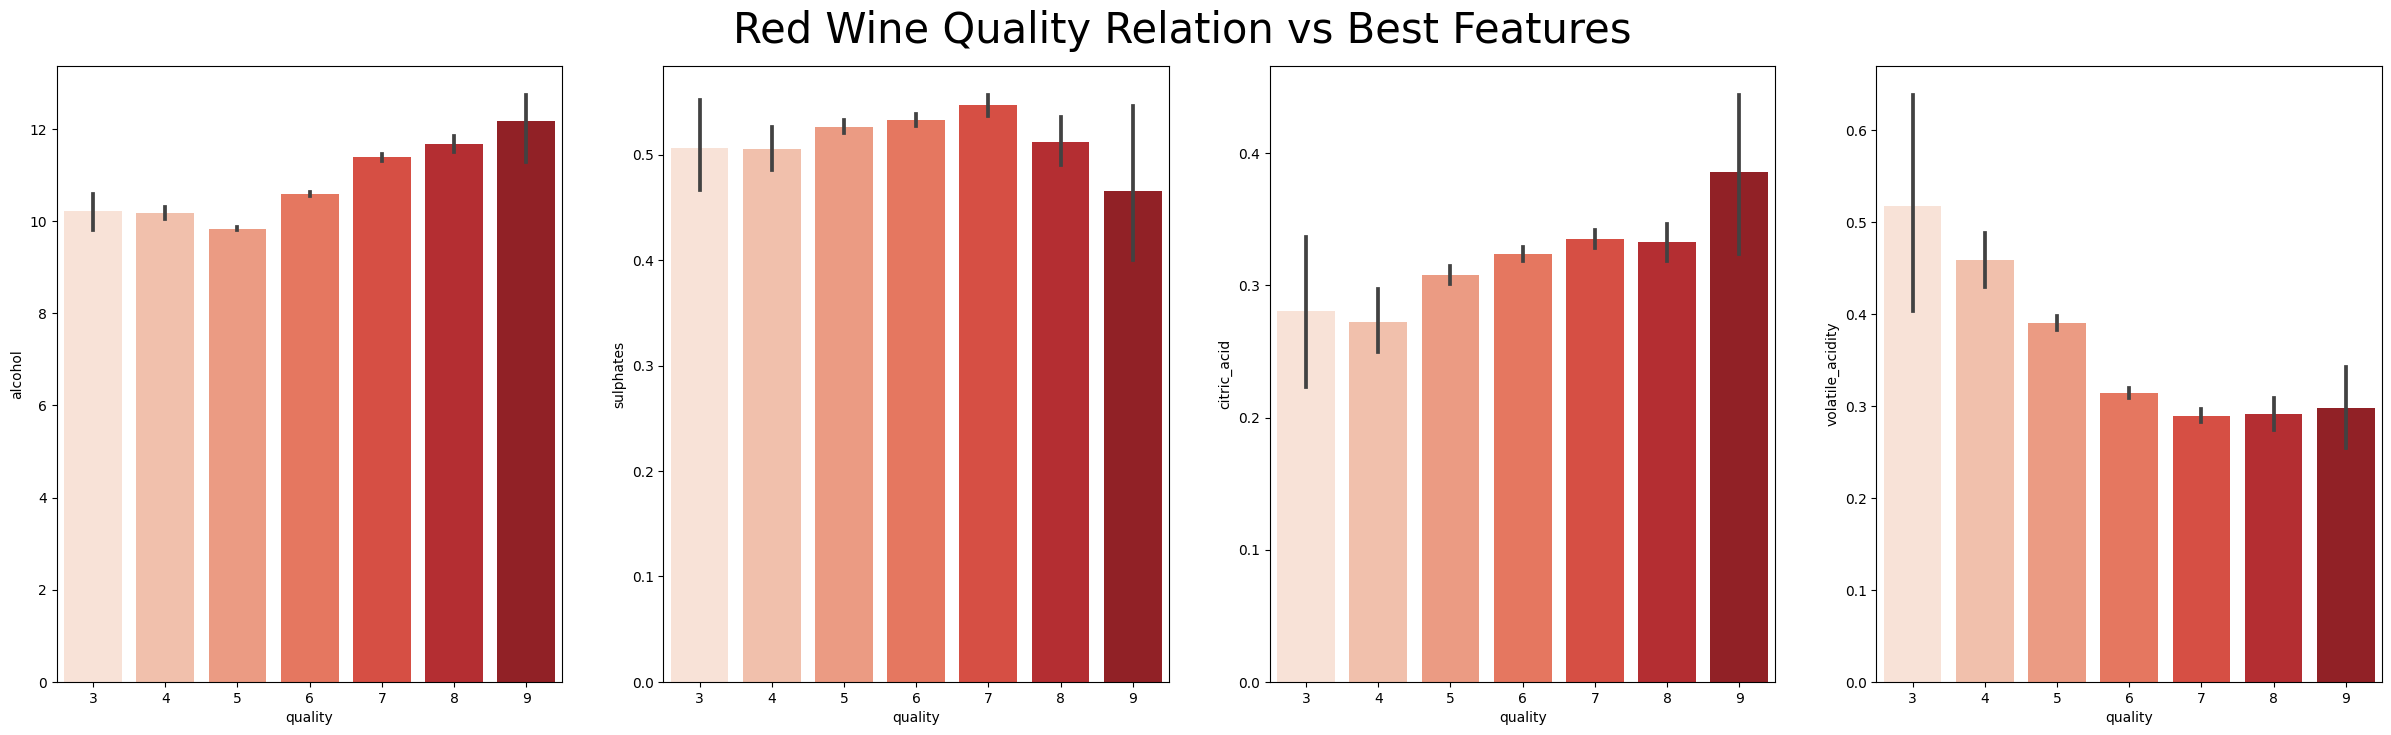

In [16]:
f, axes = plt.subplots(1, 4, figsize=(30, 8))

sns.barplot(x = 'quality', y = 'alcohol', data = df,  ax=axes[0], palette = 'Reds')
sns.barplot(x = 'quality', y = 'sulphates', data = df,  ax=axes[1], palette = 'Reds')
sns.barplot(x = 'quality', y = 'citric_acid', data = df,  ax=axes[2], palette = 'Reds')
sns.barplot(x = 'quality', y = 'volatile_acidity', data = df,  ax=axes[3], palette = 'Reds')

plt.suptitle('Red Wine Quality Relation vs Best Features', x=0.5, y=0.95, ha='center', fontsize='30')


In [17]:
df_orig_w.corr()[['quality']].sort_values(by='quality', ascending = False) # White Wine

,quality
quality,1.000000
quality_num_class,0.851016
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free_sulfur_dioxide,0.008158
citric_acid,-0.009209
residual_sugar,-0.097577
fixed_acidity,-0.113663
total_sulfur_dioxide,-0.174737


The best features related to white wine are alcohol, density, chlorides, volatile_acidity.

**CONCLUSIONS**
* There is an increasing tendency for alcohol to affect the quality of red wine.
* There is a moderate trend for density in the quality of red wine, despite the moderate correlation.
* There is a decreasing trend for Chlorides in the quality of red wine.
* There is a decreasing trend for volatile acidity in the quality of red wine.

Text(0.5, 0.95, 'White Wine Quality Relation vs Best Features')

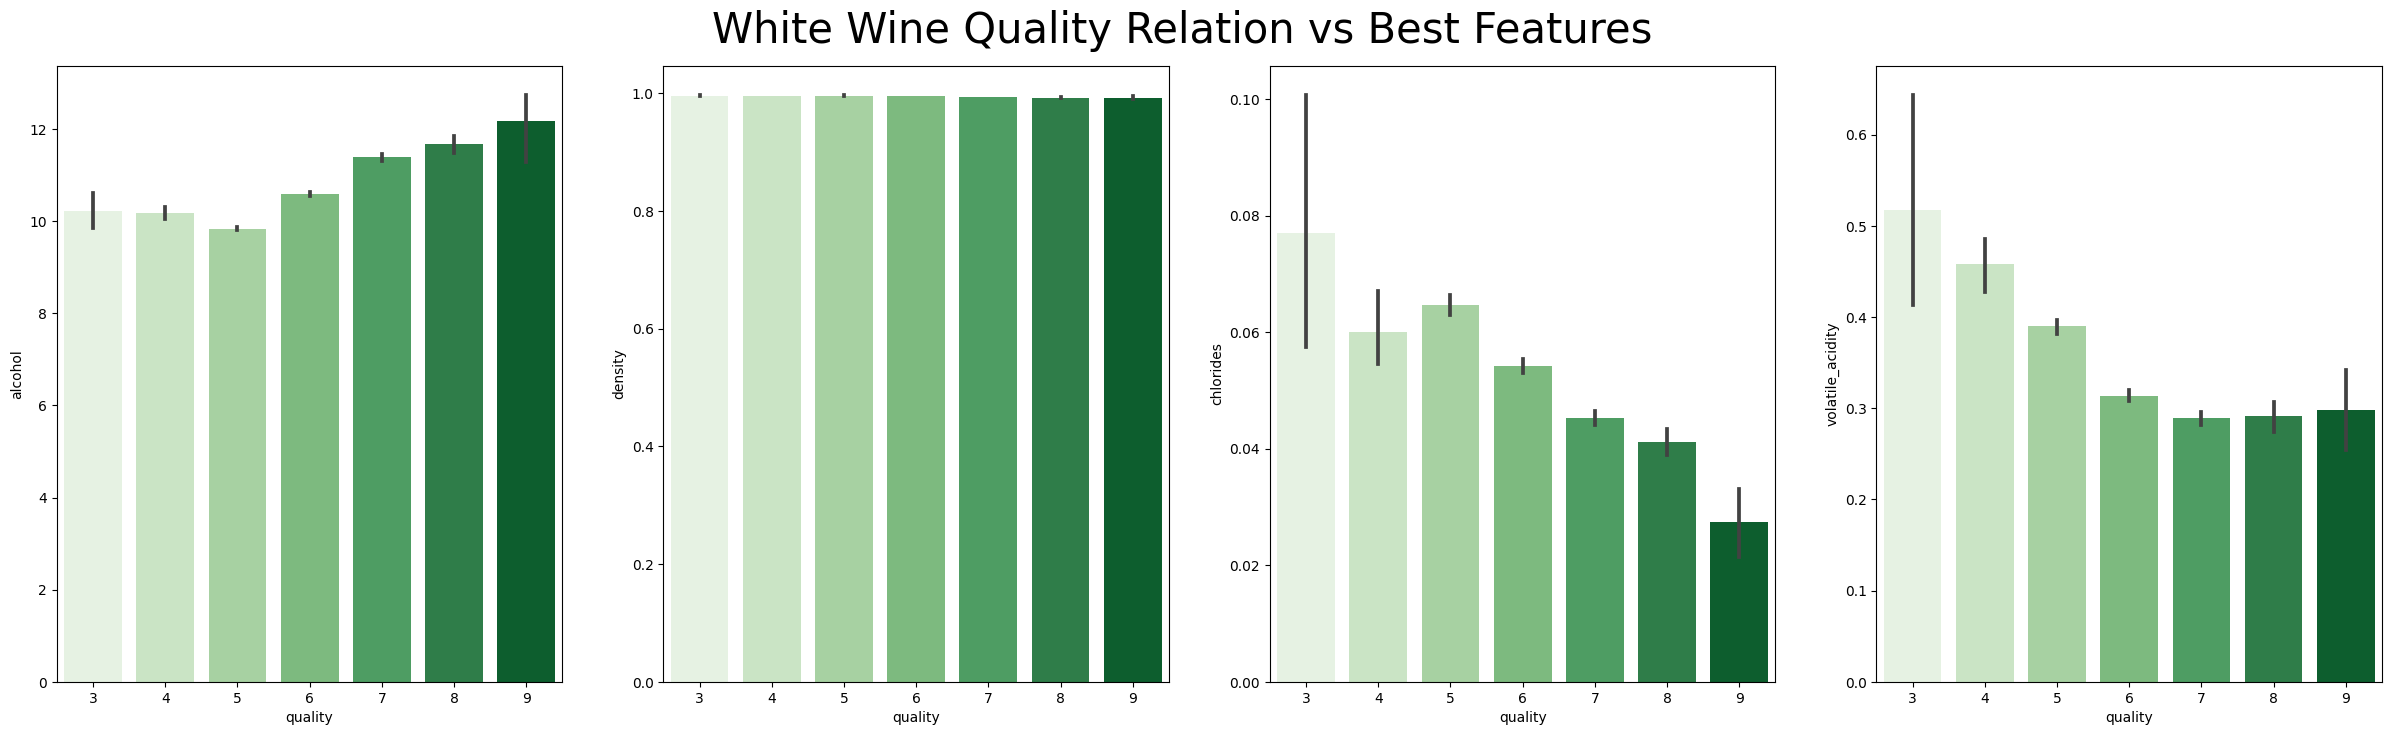

In [18]:
f, axes = plt.subplots(1, 4, figsize=(30, 8))

sns.barplot(x = 'quality', y = 'alcohol', data = df,  ax=axes[0], palette = 'Greens')
sns.barplot(x = 'quality', y = 'density', data = df,  ax=axes[1], palette = 'Greens')
sns.barplot(x = 'quality', y = 'chlorides', data = df,  ax=axes[2], palette = 'Greens')
sns.barplot(x = 'quality', y = 'volatile_acidity', data = df,  ax=axes[3], palette = 'Greens')

plt.suptitle('White Wine Quality Relation vs Best Features', x=0.5, y=0.95, ha='center', fontsize='30')


#### Correlation of difference between red and white wine

- The darker or lighter the representation of the correlation above, the more significant the difference in the interaction between white and red wine in the features in question

In [19]:
diff_corr = df_orig_r.corr() - df_orig_w.corr()

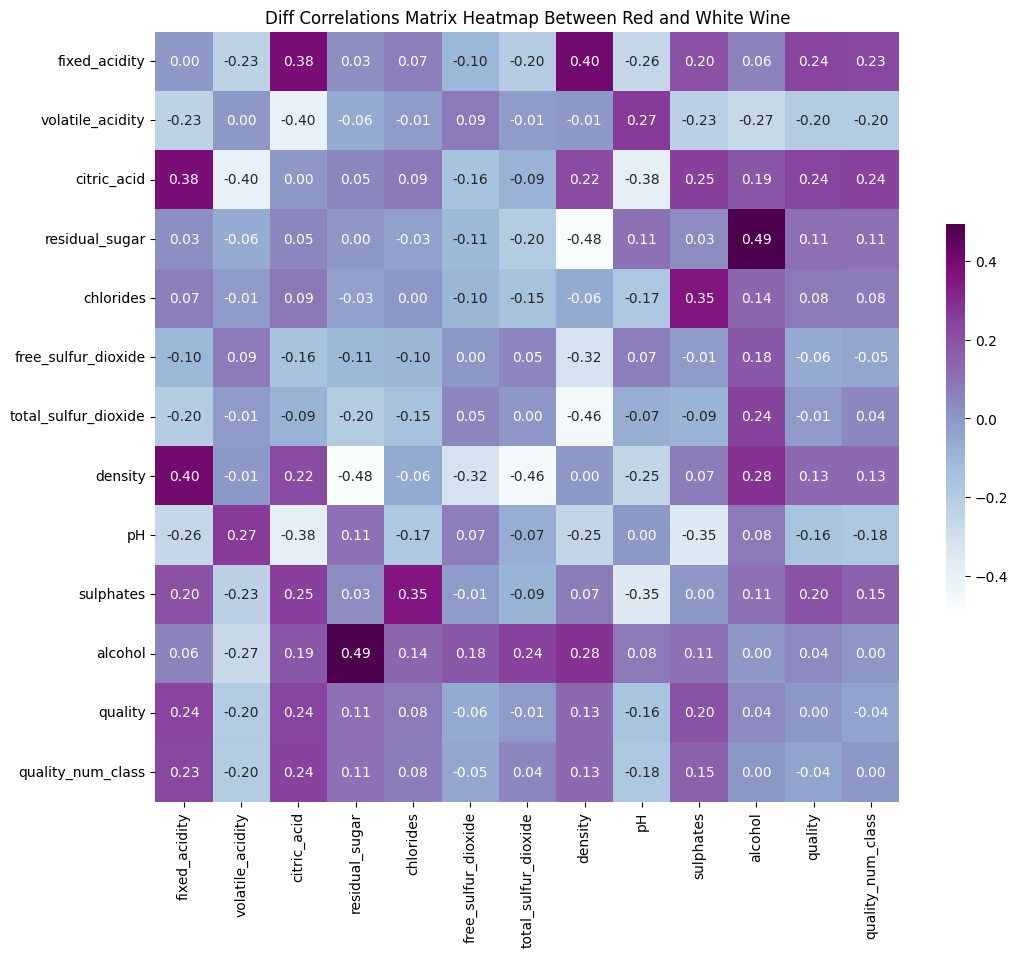

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(diff_corr, annot=True, fmt=".2f", cmap='BuPu', cbar_kws={"shrink": .5})
plt.title('Diff Correlations Matrix Heatmap Between Red and White Wine')
plt.show()

* Fixed Acidity and Citric Acid:
    * There is a significant difference (0.38) in the correlation between fixed acidity and citric acid when comparing red and white wines.
* Density and Fixed Acidity:
    * There is a notable difference (0.40) in the correlation between density and fixed acidity.
* Chlorides and Sulphates:
    * There's a relatively strong difference (0.35) in the correlation between chlorides and Sulphates.
* Alcohol and Residual Sugar:
    * This pair shows a noticeable difference (0.49) as well.